In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import decomposition

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import kruskal


In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
category_name = pd.read_csv("product_category_name_translation.csv")

In [3]:

def analyse(df):

    # Afficher la shape du dataframe
    print("Shape du dataframe : ", df.shape)

    # Afficher les informations sur les colonnes
    print("\nInformations sur les colonnes : ")
    print(df.info())

    # Afficher le nombre de valeurs manquantes par colonne
    print("\nNombre de valeurs manquantes par colonne : ")
    print(df.isnull().sum())

    # Afficher les statistiques descriptives pour les colonnes numériques
    num_cols = df.select_dtypes(include=['number']).columns
    if len(num_cols) > 0:
        print("\nStatistiques descriptives pour les colonnes numériques : ")
        print(df[num_cols].describe())
    else:
        print("\nLe dataframe ne contient pas de colonnes numériques.")

    # Afficher les valeurs uniques pour les colonnes catégorielles
    print("\nValeurs uniques pour les colonnes catégorielles : ")
    print(df.describe(include='object').transpose())


    
    return None


In [4]:
analyse(customers)
customers.head(1)

Shape du dataframe :  (99441, 5)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Nombre de valeurs manquantes par colonne : 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.9389

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [5]:
#variable interrressante : customer_unique_id

In [6]:
analyse(geolocation)
geolocation.head(1)

Shape du dataframe :  (1000163, 5)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Nombre de valeurs manquantes par colonne : 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
       geolocation_zip_code_prefix  geolocation_l

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [7]:
#variable interrressante :  geolocation_zip_code_prefix

In [8]:
analyse(items)
items.head(1)


Shape du dataframe :  (112650, 7)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Nombre de valeurs manquantes par colonne : 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
    

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [9]:
#variable interrressante : order_id , product_id,seller_id

In [10]:
analyse(payments)
payments.head(1)

Shape du dataframe :  (103886, 5)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Nombre de valeurs manquantes par colonne : 
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [45]:
#variable interressante :order_id

In [46]:
analyse(reviews)
reviews.head(1)

Shape du dataframe :  (99224, 7)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Nombre de valeurs manquantes par colonne : 
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Sta

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [47]:
#variable interressante :order_id, review_id

In [48]:
analyse(orders)
orders.head(1)

Shape du dataframe :  (99441, 8)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Nombre de valeurs manquantes par colonne : 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp       

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [49]:
#variable interressante :order_id

In [50]:
analyse(products)
products.head(1)

Shape du dataframe :  (32951, 9)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Nombre de valeurs manquantes par colonne : 
product_id                      0
product_category_name         610
product_name_lenght         

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [51]:
#variable interressante :product_id,product_category_name

In [52]:
analyse(sellers)
sellers.head(1)

Shape du dataframe :  (3095, 4)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Nombre de valeurs manquantes par colonne : 
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              6455

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [53]:
#variable interressante :seller_id

In [54]:
analyse(category_name)
category_name.head(1)

Shape du dataframe :  (71, 2)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Nombre de valeurs manquantes par colonne : 
product_category_name            0
product_category_name_english    0
dtype: int64

Le dataframe ne contient pas de colonnes numériques.

Valeurs uniques pour les colonnes catégorielles : 
                              count unique            top freq
product_category_name            71     71   beleza_saude    1
product_category_name_english    71     71  health_beauty    1


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [55]:
#variable interressante :product_category_name_english

In [56]:

# Fusionner les dataframes
df1 = pd.merge(customers, orders, on='customer_id')
df2 = pd.merge(df1, payments, on='order_id')
df3 = pd.merge(df2, reviews, on='order_id')
df4 = pd.merge(df3, items, on='order_id')
df5 = pd.merge(df4, products, on='product_id')
df6 = pd.merge(df5, sellers, on='seller_id')
df6 = pd.merge(df5, sellers, on='seller_id')




In [57]:
# Fusion des deux DataFrames horizontalement sur la colonne commune
df7 = pd.merge(df6, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Suppression de la colonne commune
df7.drop(columns=['geolocation_zip_code_prefix'], inplace=True)


In [58]:
df7

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17920944,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,26.0,11.0,26.0,39442,janauba,MG,-27.099825,-51.252254,tangara,SC
17920945,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,26.0,11.0,26.0,39442,janauba,MG,-27.099880,-51.249819,tangara,SC
17920946,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,26.0,11.0,26.0,39442,janauba,MG,-27.098167,-51.247816,tangara,SC
17920947,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,26.0,11.0,26.0,39442,janauba,MG,-27.098820,-51.249234,tangará,SC


In [59]:
df7.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state'],

In [60]:
df7[['order_item_id']].sum()

order_item_id    21584807
dtype: int64

In [61]:
 df7.isnull().sum()

customer_id                             0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
order_id                                0
order_status                            0
order_purchase_timestamp                0
order_approved_at                    2994
order_delivered_carrier_date       190511
order_delivered_customer_date      353660
order_estimated_delivery_date           0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
review_id                               0
review_score                            0
review_comment_title             15902843
review_comment_message           10522525
review_creation_date                    0
review_answer_timestamp                 0
order_item_id                           0
product_id                        

In [62]:
data = df7.drop(['customer_id','customer_zip_code_prefix','customer_city','order_status','order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date',  'review_id','review_comment_title', 'review_comment_message','review_creation_date', 'review_answer_timestamp','shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght',  'product_description_lenght', 'product_photos_qty','product_id', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','seller_zip_code_prefix', 'seller_city', 'seller_state','seller_id',  'geolocation_lat', 'geolocation_lng', 'geolocation_city','geolocation_state','order_item_id'],axis = 1)

In [63]:
data

,customer_unique_id,customer_state,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
1,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
2,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
3,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
4,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
...,...,...,...,...,...,...,...,...,...
17920944,132d0bbffd4ef7e3461c6fe4392b65ce,SC,e9613fa6e02ff8ae45f37ca30b0468a1,2017-12-20 12:04:33,1,credit_card,5,123.82,5
17920945,132d0bbffd4ef7e3461c6fe4392b65ce,SC,e9613fa6e02ff8ae45f37ca30b0468a1,2017-12-20 12:04:33,1,credit_card,5,123.82,5
17920946,132d0bbffd4ef7e3461c6fe4392b65ce,SC,e9613fa6e02ff8ae45f37ca30b0468a1,2017-12-20 12:04:33,1,credit_card,5,123.82,5
17920947,132d0bbffd4ef7e3461c6fe4392b65ce,SC,e9613fa6e02ff8ae45f37ca30b0468a1,2017-12-20 12:04:33,1,credit_card,5,123.82,5


In [64]:
 data.isnull().sum()

customer_unique_id          0
customer_state              0
order_id                    0
order_purchase_timestamp    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
review_score                0
dtype: int64

In [65]:
data['order_id'].nunique()

97643

In [66]:
nombrproduit = data.groupby(['customer_unique_id'])['order_id'].count().reset_index(name= 'produit total')


In [67]:
nombrproduit 

,customer_unique_id,produit total
0,0000366f3b9a7992bf8c76cfdf3221e2,66
1,0000b849f77a49e4a4ce2b2a4ca5be3f,144
2,0000f46a3911fa3c0805444483337064,117
3,0000f6ccb0745a6a4b88665a16c9f078,32
4,0004aac84e0df4da2b147fca70cf8255,133
...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,28
94453,fffea47cd6d3cc0a88bd621562a9d061,72
94454,ffff371b4d645b6ecea244b27531430a,55
94455,ffff5962728ec6157033ef9805bacc48,40


In [68]:
data = pd.merge(nombrproduit, data,how = 'left', on=['customer_unique_id']).drop_duplicates().reset_index(drop=True)


In [69]:
data

,customer_unique_id,produit total,customer_state,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,66,SP,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,1,credit_card,8,141.90,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,144,SP,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,1,credit_card,1,27.19,4
2,0000f46a3911fa3c0805444483337064,117,SC,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,1,credit_card,8,86.22,3
3,0000f6ccb0745a6a4b88665a16c9f078,32,PA,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,1,credit_card,4,43.62,4
4,0004aac84e0df4da2b147fca70cf8255,133,SP,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,1,credit_card,6,196.89,5
...,...,...,...,...,...,...,...,...,...,...
102208,fffcf5a5ff07b0908bd4e2dbc735a684,28,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,1,credit_card,10,2067.42,5
102209,fffea47cd6d3cc0a88bd621562a9d061,72,BA,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,1,credit_card,1,84.58,4
102210,ffff371b4d645b6ecea244b27531430a,55,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,1,credit_card,1,112.46,5
102211,ffff5962728ec6157033ef9805bacc48,40,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,1,credit_card,5,133.69,5


In [195]:
import pandas as pd

dataagg = {"order_id": pd.Series.nunique,
           'order_purchase_timestamp' : 'max', 
           'payment_installments': 'max',
           'payment_value': 'sum',
           'review_score' : 'mean', 
           'customer_state' : lambda x: x.mode(),
           'payment_type' : lambda x: x.mode()[0],
           'produit total' : 'sum',
          }


In [196]:
data2 = data.groupby("customer_unique_id").agg(dataagg).reset_index()


In [197]:
data2

,customer_unique_id,order_id,order_purchase_timestamp,payment_installments,payment_value,review_score,customer_state,payment_type,produit total
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,8,142,5,SP,credit_card,66
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,1,27,4,SP,credit_card,144
2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,8,86,3,SC,credit_card,117
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,4,44,4,PA,credit_card,32
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,6,197,5,SP,credit_card,133
...,...,...,...,...,...,...,...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,10,2067,5,PE,credit_card,28
94453,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,1,85,4,BA,credit_card,72
94454,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,1,112,5,MT,credit_card,55
94455,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,5,134,5,ES,credit_card,40


In [198]:
data2.describe()

,order_id,payment_installments,payment_value,review_score,produit total
count,94457,94457,94457,94457,94457
mean,1,3,166,4,248
std,0,3,228,1,1537
min,1,0,10,1,1
25%,1,1,63,4,58
50%,1,2,108,5,117
75%,1,4,183,5,240
max,16,24,13664,5,314325


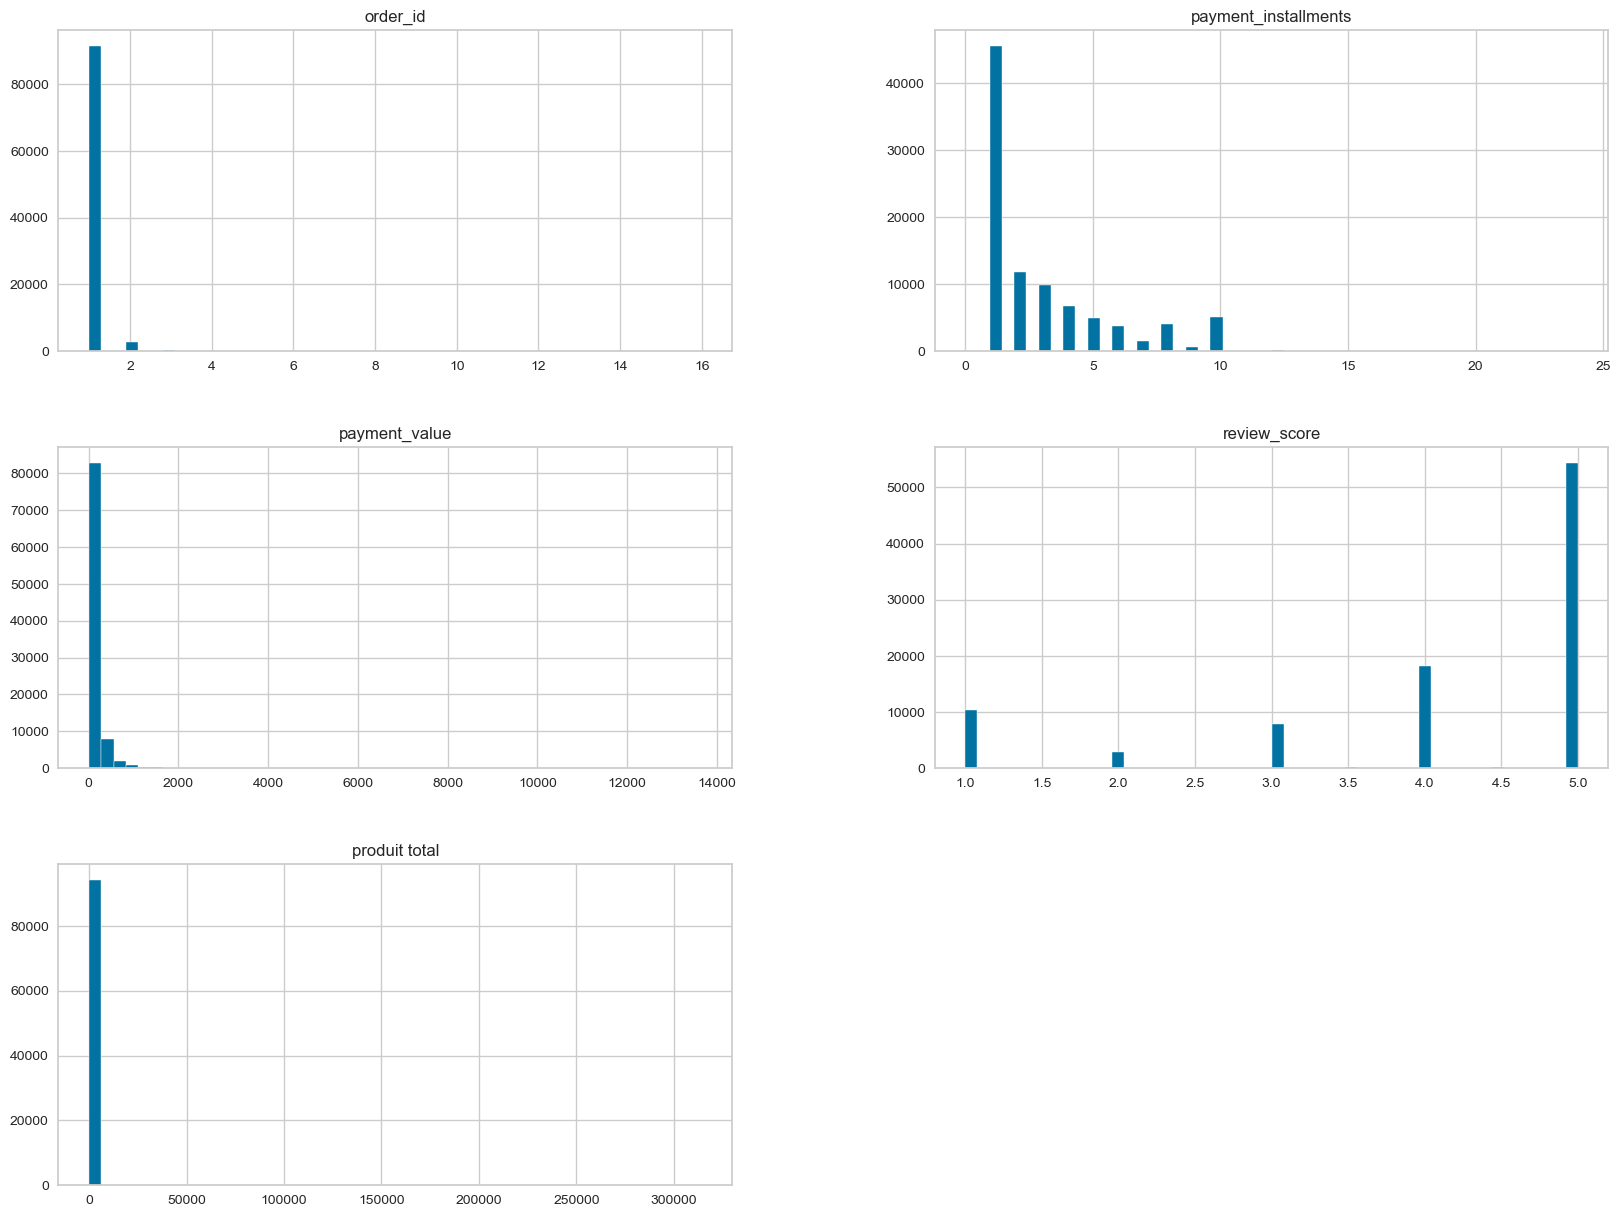

In [199]:


# Tracer l'histogramme de chaque colonne numérique
data2.hist(bins=50, figsize=(20,15))
plt.show()


C:\Users\boukh\AppData\Local\Temp\ipykernel_2588\3133563717.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


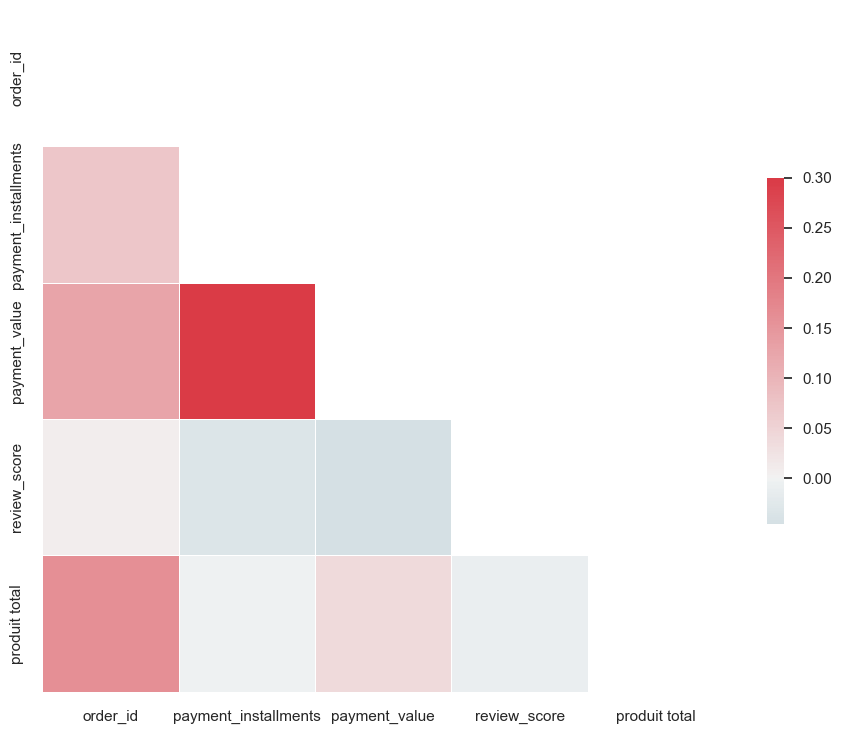

In [200]:
corr_matrix = data2.corr()
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# recence

In [201]:
# Convertir la colonne "order_purchase_timestamp" en type de données datetime
data2['order_purchase_timestamp'] = pd.to_datetime(data2['order_purchase_timestamp'])

# Calculer la date d'achat la plus récente dans le dataframe
latest_purchase_date = data2['order_purchase_timestamp'].max()

# Calculer la récence pour chaque achat en soustrayant la date d'achat la plus récente de la date d'achat pour chaque ligne
data2['recence'] = (latest_purchase_date - data2['order_purchase_timestamp']).dt.days

# Afficher les premières lignes du dataframe avec la colonne "recence"
data2


,customer_unique_id,order_id,order_purchase_timestamp,payment_installments,payment_value,review_score,customer_state,payment_type,produit total,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,8,142,5,SP,credit_card,66,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,1,27,4,SP,credit_card,144,118
2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,8,86,3,SC,credit_card,117,541
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,4,44,4,PA,credit_card,32,325
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,6,197,5,SP,credit_card,133,292
...,...,...,...,...,...,...,...,...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,10,2067,5,PE,credit_card,28,451
94453,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,1,85,4,BA,credit_card,72,266
94454,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,1,112,5,MT,credit_card,55,572
94455,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,5,134,5,ES,credit_card,40,123


In [202]:
datatime = data2

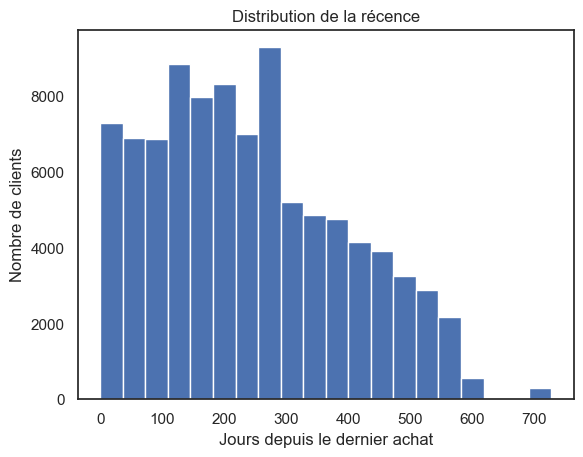

In [77]:
# Créer un histogramme de la récence avec 20 bins
plt.hist(data2['recence'], bins=20)

# Ajouter un titre et des labels d'axes
plt.title("Distribution de la récence")
plt.xlabel("Jours depuis le dernier achat")
plt.ylabel("Nombre de clients")

# Afficher le graphique
plt.show()

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

#convertir en mois
#data2['mois'] = data2['order_purchase_timestamp'].dt.to_period('M')
#mois2 =seasonal_decompose(period_decompose, model='additive', period=11)

#fig= plt.subplots(figsize=(8, 4))
#sns.lineplot(data=mois2.seasonal, x=mois2.seasonal.index, y=mois2.seasonal)
#plt.title('Décomposition saisonale des ventes')
#plt.xlabel('Mois')
#plt.ylabel('Ventes')
#plt.show()


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

#convertir en mois
#data2['order_purchase_timestamp'] = data2['order_purchase_timestamp'].dt.to_period('M')
#period = data2.groupby('order_purchase_timestamp').size()

#mois2 =seasonal_decompose(period, model='additive', period=11)

#fig= plt.subplots(figsize=(8, 4))
#sns.lineplot(data=mois2.seasonal, x=mois2.seasonal.index, y=mois2.seasonal)
#plt.title('Décomposition saisonale des ventes')
#plt.xlabel('Mois')
#plt.ylabel('Ventes')
#plt.show()


- pic en octobre 2016 et novembre 2017
- baisse de vente de juillet a septembre

In [3]:
#fig= plt.subplots(figsize=(8, 4))
#sns.lineplot(data=mois2.trend, x=mois2.trend.index, y=mois2.trend)
#plt.title('tendances des ventes')
#plt.xlabel('Mois')
#plt.ylabel('Ventes')
#plt.show()

Tendance croissance jusqua 03-2018

In [6]:
#fig= plt.subplots(figsize=(8, 4))
#sns.lineplot(data=mois2.resid, x=mois2.resid.index, y=mois2.resid)
#plt.title('valeur residuelle')
#plt.xlabel('Mois')
#plt.ylabel('Ventes')
#plt.show()

In [7]:
#représente la série chronologique originale sans la tendance, la saisonnalité et les résidus.
#fig= plt.subplots(figsize=(8, 4))
#sns.lineplot(data=mois2.observed, x=mois2.observed.index, y=mois2.observed)
#plt.title('valeur observé')
#plt.xlabel('Mois')
#plt.ylabel('Ventes')
#plt.show()

# frequence 


In [83]:
data2.order_id.value_counts(normalize=True)


1     0.969722
2     0.027812
3     0.001959
4     0.000307
5     0.000095
6     0.000053
7     0.000032
9     0.000011
16    0.000011
Name: order_id, dtype: float64

97% des clients ont fais seulement 1 seule commande 

In [84]:
data2[data2['order_id'] > 6]


,customer_unique_id,order_id,order_purchase_timestamp,payment_installments,payment_value,review_score,customer_state,payment_type,produit total,recence,mois
10185,1b6c7548a2a1f9037c1fd3ddfed95f33,7,2018-02,1,959.01,5.000000,MG,boleto,2560,200,2018-02
23077,3e43e6105506432c953e165fb2acf44c,9,2018-02,10,1172.66,2.777778,SP,credit_card,45972,187,2018-02
37172,6469f99c1f9dfae7733b25662e7f1782,7,2018-06,6,758.83,5.000000,SP,credit_card,30177,67,2018-06
52090,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08,3,902.04,5.000000,SP,credit_card,20992,13,2018-08
74797,ca77025e7201e3b30c44b472ff346268,7,2018-06,1,1122.72,5.000000,PE,credit_card,24276,93,2018-06


une personne a fait 9 commande et une autre personne a fait 16 commande. ce sont les meilleurs clients 

In [85]:
# grouper les achats par commande
grouped_orders = data2.groupby('order_id')

# calculer le nombre d'achats par commande
orders_freq = grouped_orders.size()

# calculer la fréquence par commande
freq_per_order = len(data2) / len(grouped_orders)

print('Fréquence par commande :', freq_per_order)


Fréquence par commande : 10495.222222222223


 # montant des commande

In [86]:
montant_commande = data2.groupby('order_id')['payment_value'].sum()
montant_commande

order_id
1     14774909.96
2       789398.76
3        83051.28
4        22696.91
5         6719.17
6         3516.57
7         2840.56
9         1172.66
16         902.04
Name: payment_value, dtype: float64

In [87]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

montant_commande.describe()

count          9
mean     1742801
std      4893777
min          902
25%         2841
50%         6719
75%        83051
max     14774910
Name: payment_value, dtype: float64

In [88]:
data2

,customer_unique_id,order_id,order_purchase_timestamp,payment_installments,payment_value,review_score,customer_state,payment_type,produit total,recence,mois
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05,8,142,5,SP,credit_card,66,115,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05,1,27,4,SP,credit_card,144,118,2018-05
2,0000f46a3911fa3c0805444483337064,1,2017-03,8,86,3,SC,credit_card,117,541,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10,4,44,4,PA,credit_card,32,325,2017-10
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11,6,197,5,SP,credit_card,133,292,2017-11
...,...,...,...,...,...,...,...,...,...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06,10,2067,5,PE,credit_card,28,451,2017-06
94453,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12,1,85,4,BA,credit_card,72,266,2017-12
94454,ffff371b4d645b6ecea244b27531430a,1,2017-02,1,112,5,MT,credit_card,55,572,2017-02
94455,ffff5962728ec6157033ef9805bacc48,1,2018-05,5,134,5,ES,credit_card,40,123,2018-05


# Segmentation  

## PCA RFM

In [89]:
data_pca1 = data2[['payment_value','order_id','recence']]
data_pca1

,payment_value,order_id,recence
0,142,1,115
1,27,1,118
2,86,1,541
3,44,1,325
4,197,1,292
...,...,...,...
94452,2067,1,451
94453,85,1,266
94454,112,1,572
94455,134,1,123


In [90]:
X = data_pca1
keep_ind = X.index
X = StandardScaler().fit_transform(X)


In [91]:
n_components = 3
pca = PCA(n_components=n_components)

pca.fit(X)
var = pca.explained_variance_ratio_
var

array([0.37672456, 0.33304003, 0.29023541])

In [92]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([37.67, 33.3 , 29.02])

In [93]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 38.,  71., 100.])

In [94]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3]

In [95]:
print (pca.explained_variance_ratio_)

[0.37672456 0.33304003 0.29023541]


In [96]:
print (pca.explained_variance_ratio_.cumsum())

[0.37672456 0.70976459 1.        ]


In [97]:
def create_pca_explained_variance_table(pca):
    var = pca.explained_variance_ratio_*100
    explained_variance_table = pd.DataFrame({'Composante principale': range(1, len(var)+1),
                                            'Pourcentage de variance expliquée': var})
    explained_variance_table['Pourcentage de variance expliquée cumulé'] = explained_variance_table['Pourcentage de variance expliquée'].cumsum()
    return explained_variance_table

In [98]:
create_pca_explained_variance_table(pca)

,Composante principale,Pourcentage de variance expliquée,Pourcentage de variance expliquée cumulé
0,1,38,38
1,2,33,71
2,3,29,100


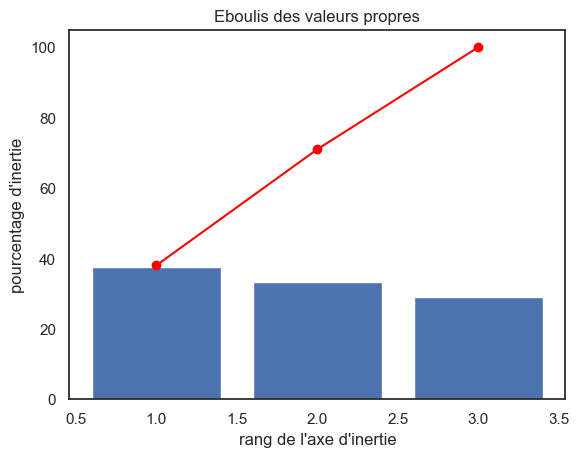

In [99]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [100]:
pcs = pca.components_
pcs

array([[ 0.69601693,  0.70577498, -0.13206857],
       [ 0.16737566,  0.01938866,  0.98570253],
       [-0.69824481,  0.70817071,  0.10463472]])

In [101]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2
0,1,1,-0
1,0,0,1
2,-1,1,0


In [102]:
features =['payment_value','order_id','recence']

In [103]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,payment_value,order_id,recence
F1,1,1,-0
F2,0,0,1
F3,-1,1,0


In [104]:
pcs.T

,F1,F2,F3
payment_value,1,0,-1
order_id,1,0,1
recence,-0,1,0


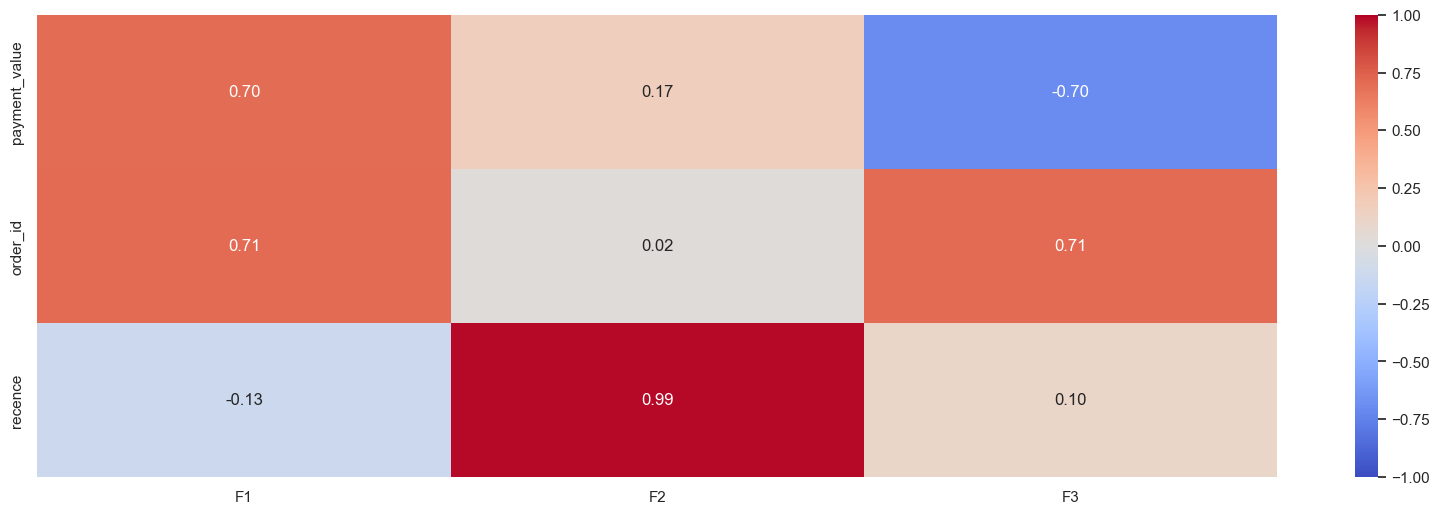

In [105]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

In [106]:
x, y = 0,1

In [107]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    #Titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

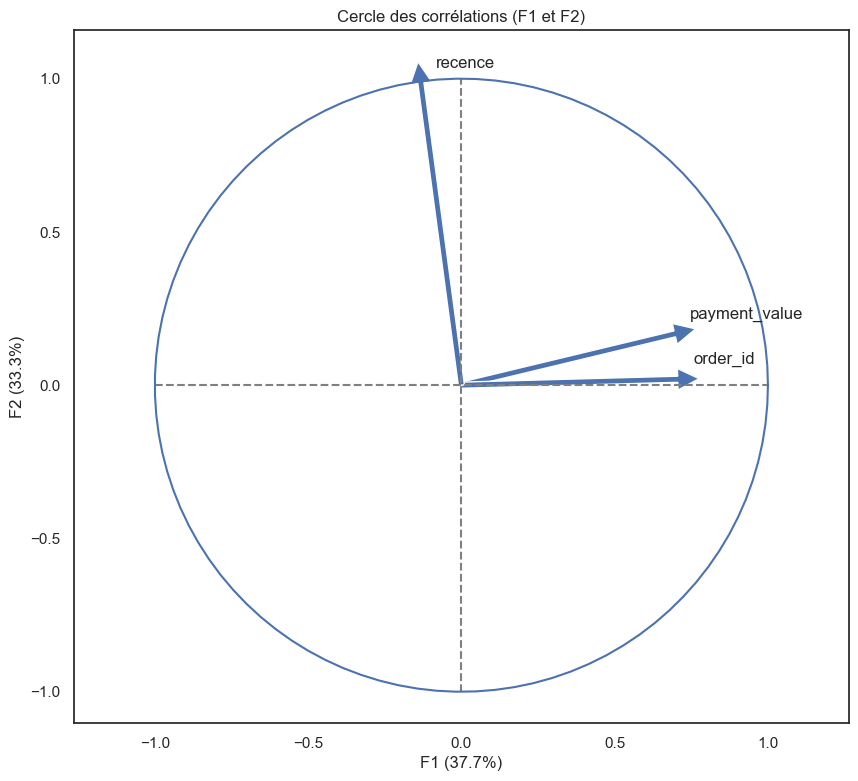

In [108]:
correlation_graph(pca,(0,1),features)

# T SNE

In [109]:
from sklearn.manifold import TSNE

In [110]:
X_pca = pca.transform(X)[:,:3]

In [111]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_pca.copy())

C:\Users\boukh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\boukh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

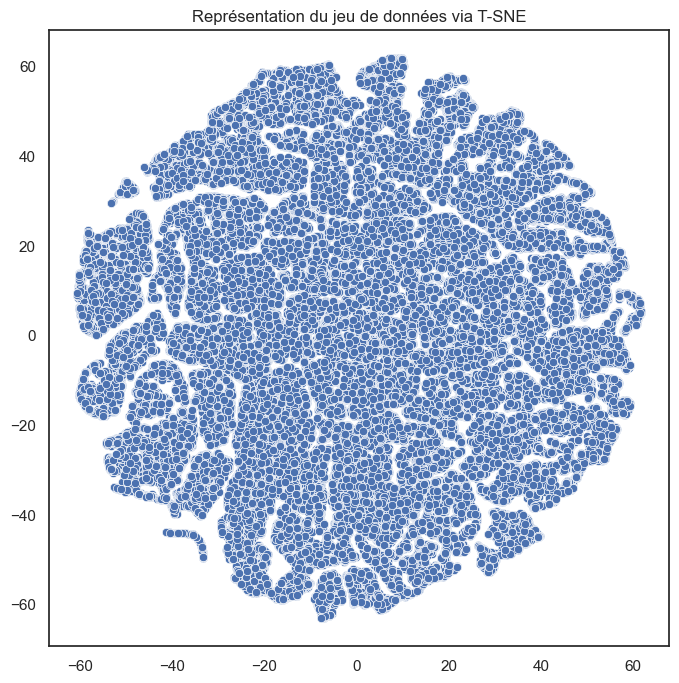

In [112]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:,0], T[:,1])

In [113]:
T

array([[  5.953875  ,   9.899439  ],
       [-23.329855  , -55.920998  ],
       [-29.951876  ,  34.124626  ],
       ...,
       [-33.80198   ,  42.803875  ],
       [ 12.098506  ,   0.20297702],
       [ 23.884306  , -15.317915  ]], dtype=float32)

In [114]:
X_pca

array([[-0.07702863, -0.8410792 , -0.12644127],
       [-0.43029489, -0.90610531,  0.22741022],
       [-0.61452346,  1.85917261,  0.33530636],
       ...,
       [-0.5610318 ,  2.07793916,  0.27600617],
       [-0.1090246 , -0.79563721, -0.09579767],
       [-0.61364662,  1.50735565,  0.34406471]])

# kmeans 

In [116]:
datak = data2[['order_id','payment_value','recence']]

In [117]:
def kmeans_cluster(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    df['cluster'] = kmeans.predict(df)
    return df

In [118]:
kmeansa = kmeans_cluster(datak,5)
kmeansa

C:\Users\boukh\AppData\Local\Temp\ipykernel_2588\915648448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


,order_id,payment_value,recence,cluster
0,1,142,115,1
1,1,27,118,1
2,1,86,541,4
3,1,44,325,4
4,1,197,292,4
...,...,...,...,...
94452,1,2067,451,3
94453,1,85,266,4
94454,1,112,572,4
94455,1,134,123,1


In [119]:
def plot_kmeans(df, n_clusters):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    df['cluster'] = kmeans.predict(df)
    
    # Perform PCA to reduce the dimensions of the data to 2D
    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df)
    
    # Plot the data points with different colors for each cluster
    plt.scatter(df_2d[:,0], df_2d[:,1], c=df['cluster'], cmap='viridis')
    plt.show()

C:\Users\boukh\AppData\Local\Temp\ipykernel_2588\3961377517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


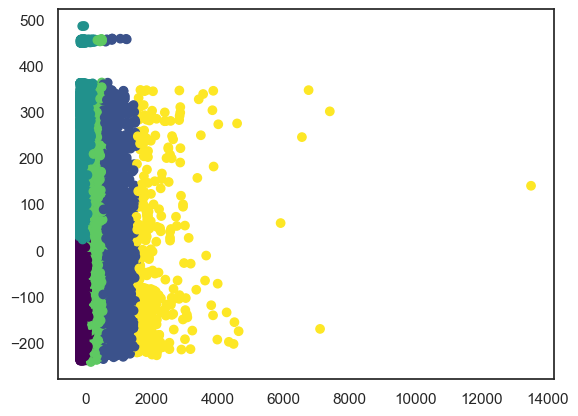

In [120]:
plot_kmeans(datak, 5)

In [121]:
def optimize_kmeans(X, max_clusters):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
        
    plt.plot(range(1, max_clusters + 1), sse)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for Optimal K")
    plt.show()
    return



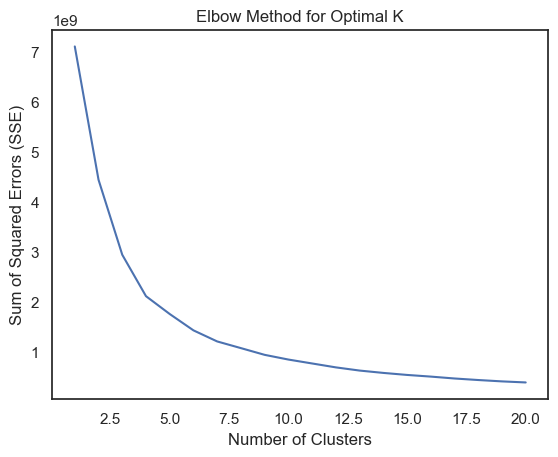

In [122]:
optimize_kmeans(datak, 20)

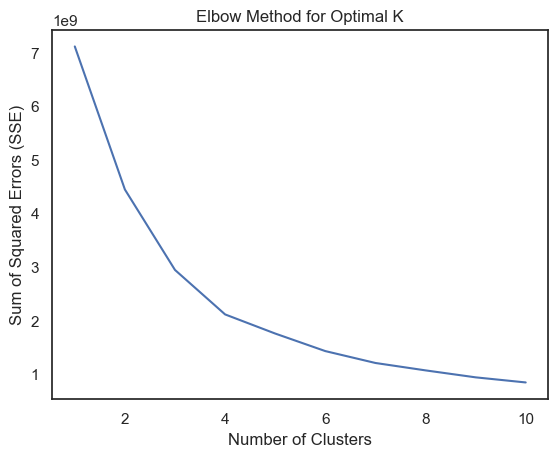

In [123]:
optimize_kmeans(datak, 10)

In [124]:
def analyse_silhouette(X2, n_clusters_liste):

    meilleur_score_silhouette = -1
    meilleur_n_clusters = -1
    
    for n_clusters in n_clusters_liste:
        # Créer une instance de KMeans
        kmeans = KMeans(n_clusters=n_clusters)
        
        # Ajuster le modèle KMeans aux données
        kmeans.fit(X2)
        
        # Prédire les étiquettes de cluster pour chaque point de données
        étiquettes = kmeans.labels_
        
        # Calculer le score de silhouette pour le modèle
        score_silhouette = silhouette_score(X2, étiquettes)
        
        # Mettre à jour le meilleur score de silhouette et le nombre de clusters si le score actuel est meilleur
        if score_silhouette > meilleur_score_silhouette:
            meilleur_score_silhouette = score_silhouette
            meilleur_n_clusters = n_clusters
    
    return meilleur_n_clusters, meilleur_score_silhouette

In [125]:
# Extraire les valeurs des caractéristiques sous forme de tableau numpy
X2 = datak.values

# Définir la plage de nombres de clusters à tester
n_clusters_liste = range(2, 8)

# Effectuer l'analyse de la silhouette
meilleur_n_clusters, meilleur_score_silhouette = analyse_silhouette(X2, n_clusters_liste)

print("Meilleur nombre de clusters: {}".format(meilleur_n_clusters))
print("Meilleur score de silhouette: {:.3f}".format(meilleur_score_silhouette))

Meilleur nombre de clusters: 2
Meilleur score de silhouette: 0.735


C:\Users\boukh\AppData\Local\Temp\ipykernel_2588\3961377517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


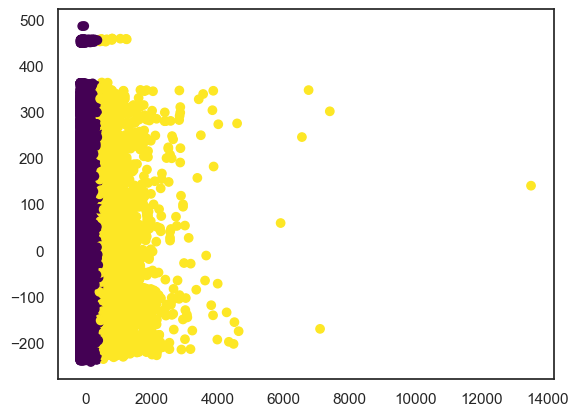

In [126]:
plot_kmeans(datak, 2)

In [127]:
XX = datak.values

In [128]:
kmeanss = KMeans(n_clusters=2)

In [129]:
kmeanss.fit(XX)

KMeans(n_clusters=2)

In [130]:
labels = kmeanss.labels_

In [131]:
silhouette_score(XX, labels)

0.7352143046933279

In [132]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

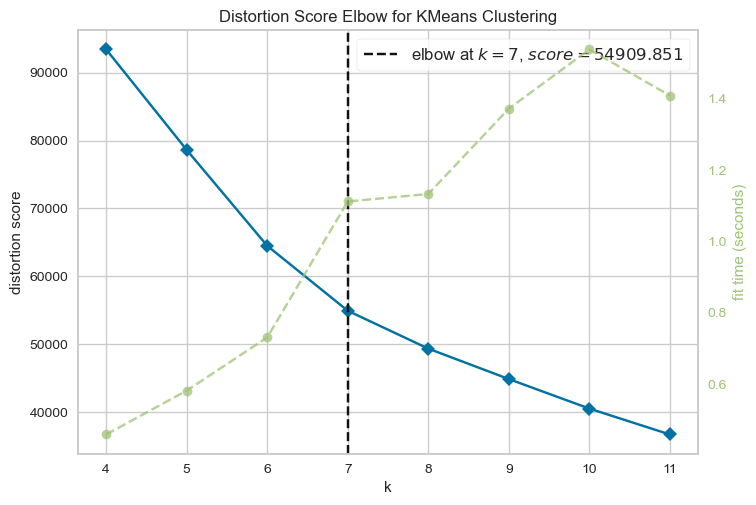

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [133]:
# Instantiate the clustering model and visualizer
model = KMeans(5)
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [134]:
model = KMeans(5, random_state=42)


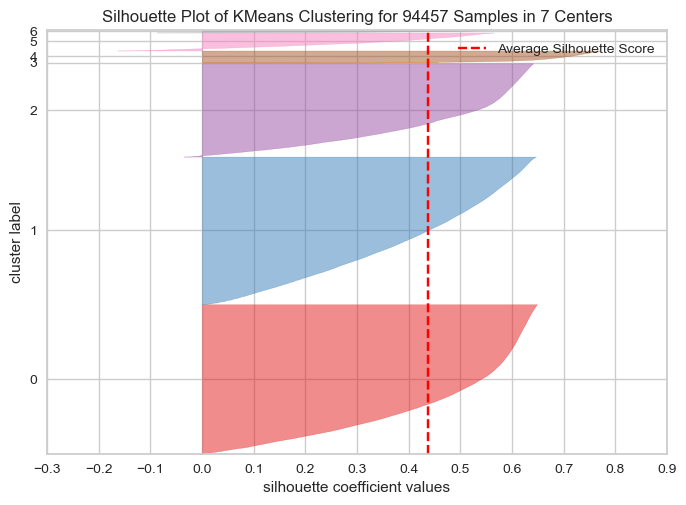

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 94457 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [135]:
# Instantiate the clustering model and visualizer 
model = KMeans(7)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

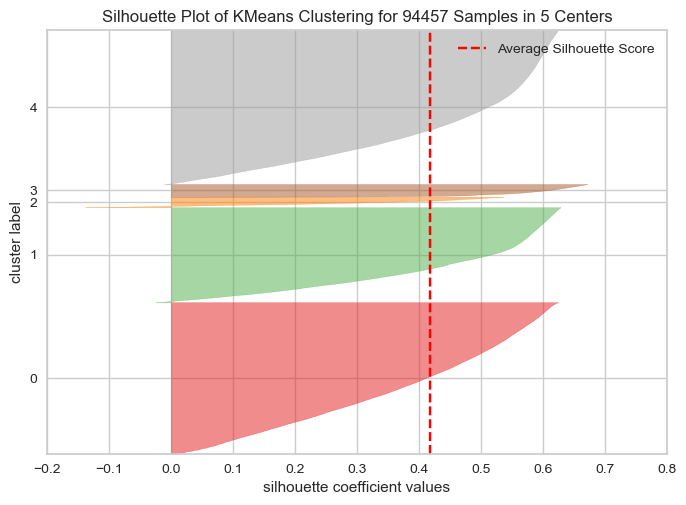

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 94457 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [136]:
# Instantiate the clustering model and visualizer 
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

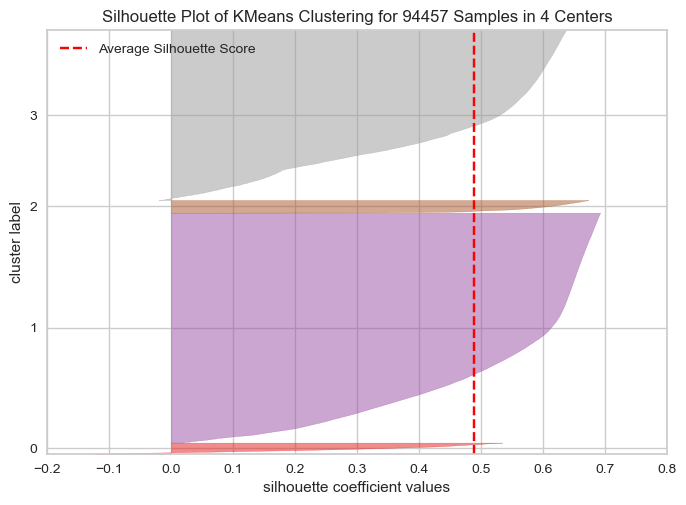

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 94457 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [137]:
# Instantiate the clustering model and visualizer 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

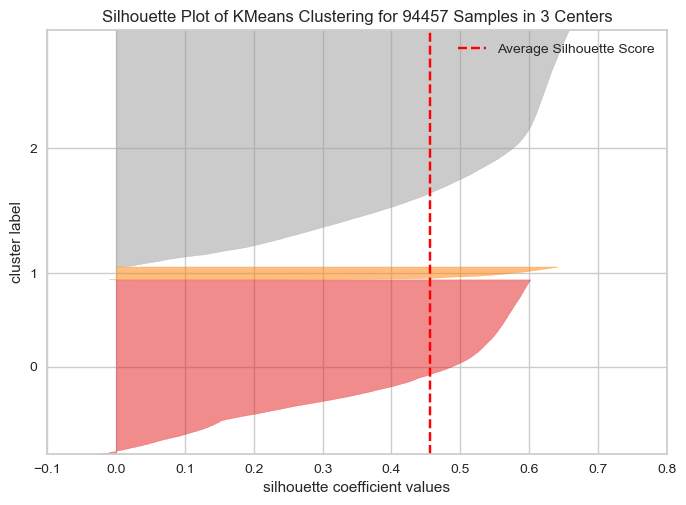

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 94457 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [138]:
# Instantiate the clustering model and visualizer 
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [139]:
kb = kmeans_cluster(datak,7)

C:\Users\boukh\AppData\Local\Temp\ipykernel_2588\915648448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


In [140]:
res_clusters_rfm  = kb.groupby(['cluster']).agg({
        'recence': 'mean',
        'order_id': 'mean',
        'payment_value': ['mean', 'count']
    }).round(0)
res_clusters_rfm

recence order_id payment_value       
           mean     mean          mean  count
cluster                                      
0           466        1           120  20220
1           204        1           347   9626
2           272        1          3683     76
3           261        1            98  29999
4           254        1           769   2849
5           243        1          1622    741
6            90        1           107  30946

In [141]:
cluster_1 = kb[kb['cluster'] == 3]
cluster_1

,order_id,payment_value,recence,cluster
3,1,44,325,3
4,1,197,292,3
11,1,126,287,3
15,1,94,338,3
16,1,29,264,3
...,...,...,...,...
94445,1,55,366,3
94448,1,81,307,3
94449,1,73,259,3
94450,1,167,249,3


# DBSCAN

In [142]:
from sklearn.cluster import DBSCAN

In [143]:
dbs = DBSCAN(eps = 1, 
             min_samples=5,
               n_jobs=-1).fit(X_pca.copy())

C:\Users\boukh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation de la séparation des données du DBSCAN via T-SNE'}>

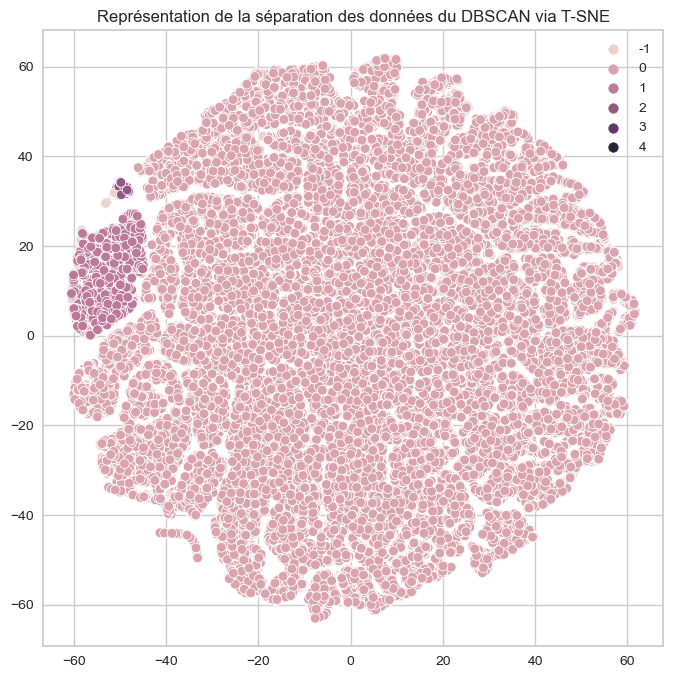

In [144]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du DBSCAN via T-SNE')
sns.scatterplot(T[:,0], T[:,1], dbs.labels_)

In [145]:
data_pca = data2[['payment_value','review_score','order_id','recence']]

In [146]:
X = data_pca
keep_ind = X.index
X = StandardScaler().fit_transform(X)



In [147]:
n_components = 4
pca = PCA(n_components=n_components)

pca.fit(X)
var = pca.explained_variance_ratio_
var

array([0.28357861, 0.2568314 , 0.24444732, 0.21514267])

In [148]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([28.36, 25.68, 24.44, 21.51])

In [149]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 28.,  54.,  78., 100.])

In [150]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

In [151]:
print (pca.explained_variance_ratio_)

[0.28357861 0.2568314  0.24444732 0.21514267]


In [152]:
print (pca.explained_variance_ratio_.cumsum())

[0.28357861 0.54041001 0.78485733 1.        ]


In [153]:
def create_pca_explained_variance_table(pca):
    var = pca.explained_variance_ratio_*100
    explained_variance_table = pd.DataFrame({'Composante principale': range(1, len(var)+1),
                                            'Pourcentage de variance expliquée': var})
    explained_variance_table['Pourcentage de variance expliquée cumulé'] = explained_variance_table['Pourcentage de variance expliquée'].cumsum()
    return explained_variance_table

In [154]:
create_pca_explained_variance_table(pca)

,Composante principale,Pourcentage de variance expliquée,Pourcentage de variance expliquée cumulé
0,1,28,28
1,2,26,54
2,3,24,78
3,4,22,100


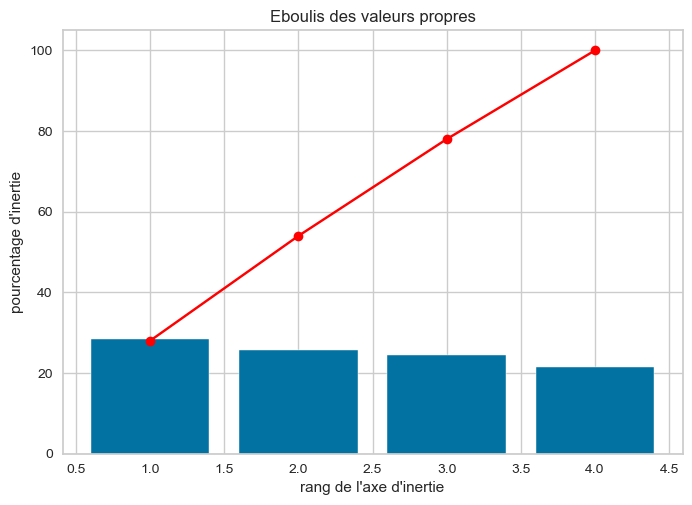

In [155]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [156]:
pcs = pca.components_
pcs

array([[ 0.70726103, -0.17941723,  0.67666553, -0.098565  ],
       [-0.11726321,  0.7169973 ,  0.21774362, -0.65172995],
       [ 0.04179187,  0.6188452 ,  0.22965593,  0.75002814],
       [-0.69590561, -0.26599802,  0.66480797,  0.05468822]])

In [157]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3
0,1,-0,1,-0
1,-0,1,0,-1
2,0,1,0,1
3,-1,-0,1,0


In [158]:
features =['payment_value','review_score','order_id','recence']

In [159]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,payment_value,review_score,order_id,recence
F1,1,-0,1,-0
F2,-0,1,0,-1
F3,0,1,0,1
F4,-1,-0,1,0


In [160]:
pcs.T

,F1,F2,F3,F4
payment_value,1,-0,0,-1
review_score,-0,1,1,-0
order_id,1,0,0,1
recence,-0,-1,1,0


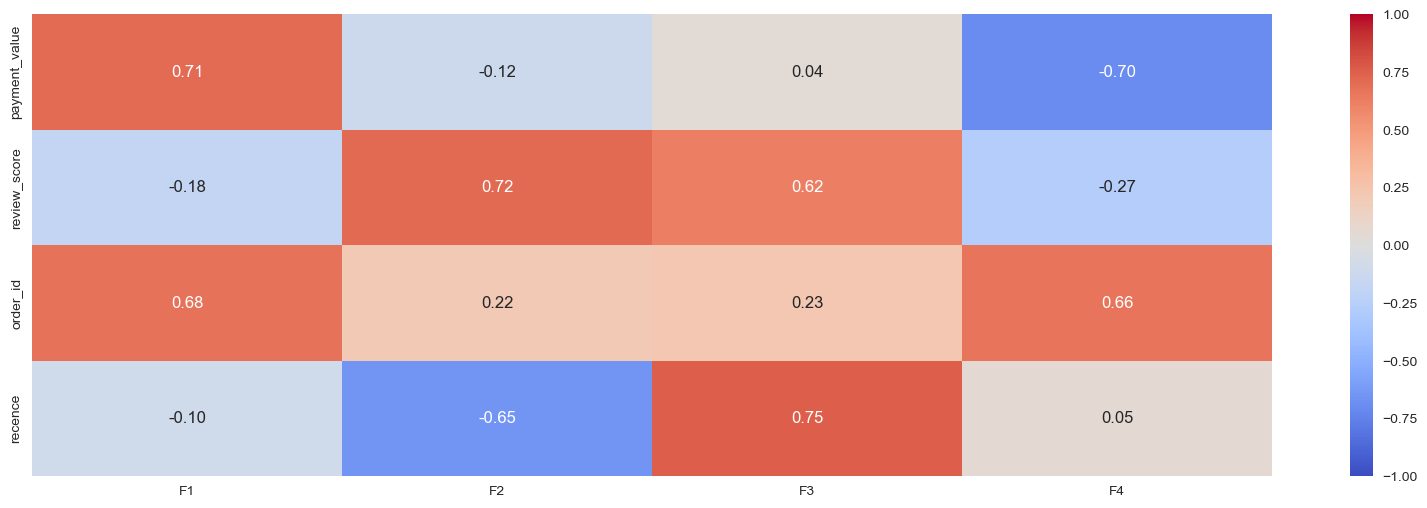

In [161]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

In [162]:
x, y = 0,1

In [163]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    #Titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

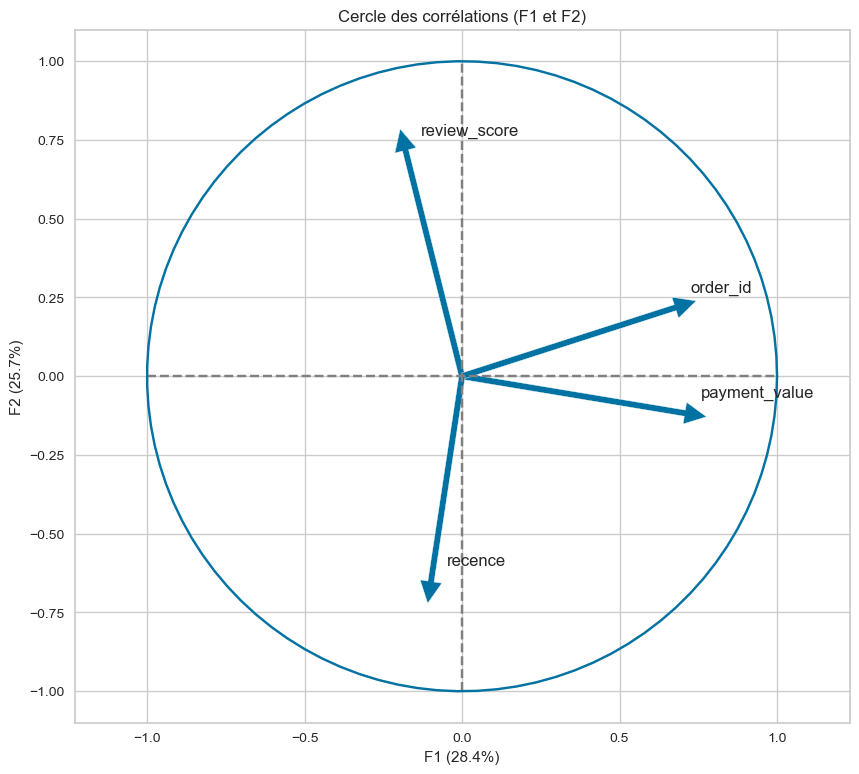

In [164]:
correlation_graph(pca,(0,1),features)

Plus le montant est élevé, plus l'échéancier de paiement est élevé aussi.


In [165]:
X_projected = pca.transform(X)

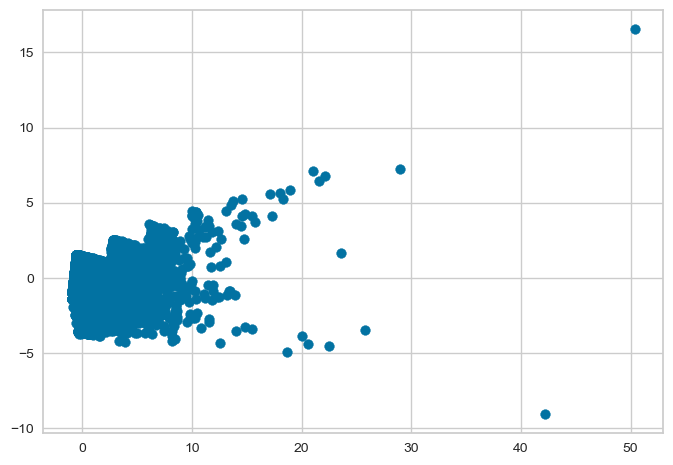

In [166]:
plt.scatter(X_projected[:,0],X_projected[:,1])


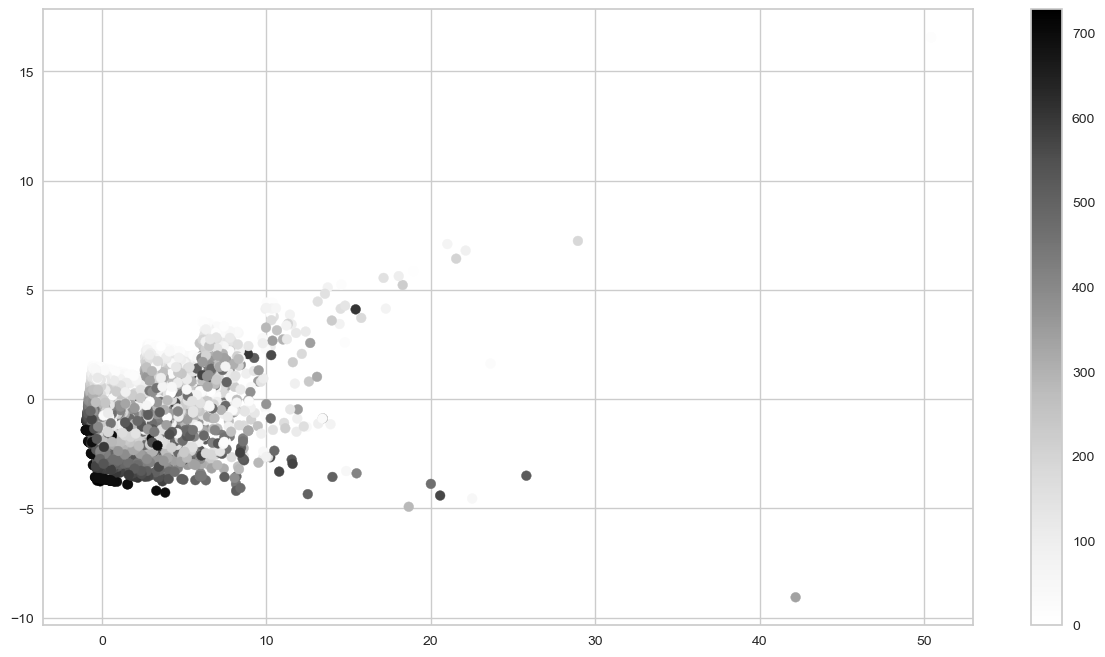

In [167]:
plt.figure(figsize=(15,8))
plt.scatter(X_projected[:,0],X_projected[:,1], c = data2.get('recence'))
plt.colorbar()

In [168]:

pca_rfm = decomposition.PCA(random_state=1)
projected_rfm = pca_rfm.fit_transform(X)


In [169]:
X["PC1"] =projected_rfm[:,0]
X["PC2"] = projected_rfm[:,1]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Réduire la dimensionalité des données, c'est-à-dire le nombre de variables utilisées pour les représenter, permet :

- de faciliter la visualisation des données ;

- de réduire les coûts de calcul, de stockage et d'acquisition des données ;

- d'améliorer l'apprentissage en construisant des modèles moins complexes, en éliminant les variables non pertinentes qui pourraient fausser les prédictions et enfin en réduisant le problème du fléau de la dimensionalité.

In [364]:
from sklearn.manifold import TSNE

In [365]:
X_pca = pca.transform(X)[:,:19]


In [366]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_pca.copy())

C:\Users\boukh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\boukh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

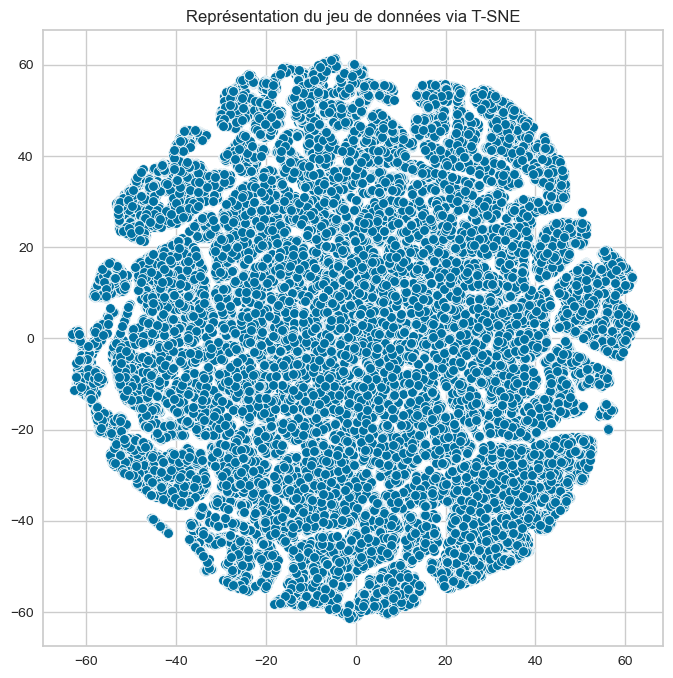

In [367]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:,0], T[:,1])

In [598]:
 X_train, X_test,  = train_test_split(
                     X_pca,  test_size=0.8, random_state=0)

# Kmeans 

In [372]:
data2

,customer_unique_id,order_id,order_purchase_timestamp,payment_installments,payment_value,review_score,customer_state,payment_type,produit total,recence,mois
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05,8,142,5,SP,credit_card,66,115,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05,1,27,4,SP,credit_card,144,118,2018-05
2,0000f46a3911fa3c0805444483337064,1,2017-03,8,86,3,SC,credit_card,117,541,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10,4,44,4,PA,credit_card,32,325,2017-10
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11,6,197,5,SP,credit_card,133,292,2017-11
...,...,...,...,...,...,...,...,...,...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06,10,2067,5,PE,credit_card,28,451,2017-06
94453,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12,1,85,4,BA,credit_card,72,266,2017-12
94454,ffff371b4d645b6ecea244b27531430a,1,2017-02,1,112,5,MT,credit_card,55,572,2017-02
94455,ffff5962728ec6157033ef9805bacc48,1,2018-05,5,134,5,ES,credit_card,40,123,2018-05


In [373]:
datak = data2[['order_id','payment_value','review_score','recence']]

In [374]:
def kmeans_cluster(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    df['cluster'] = kmeans.predict(df)
    return df

In [375]:
kmeansb = kmeans_cluster(datak,5)
kmeansb

C:\Users\boukh\AppData\Local\Temp\ipykernel_22592\915648448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


,order_id,payment_value,review_score,recence,cluster
0,1,142,5,115,2
1,1,27,4,118,2
2,1,86,3,541,3
3,1,44,4,325,3
4,1,197,5,292,3
...,...,...,...,...,...
94452,1,2067,5,451,4
94453,1,85,4,266,2
94454,1,112,5,572,3
94455,1,134,5,123,2


In [170]:
def plot_kmeans(df, n_clusters):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    df['cluster'] = kmeans.predict(df)
    
    # Perform PCA to reduce the dimensions of the data to 2D
    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df)
    
    # Plot the data points with different colors for each cluster
    plt.scatter(df_2d[:,0], df_2d[:,1], c=df['cluster'], cmap='viridis')
    plt.show()

C:\Users\boukh\AppData\Local\Temp\ipykernel_2588\3961377517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


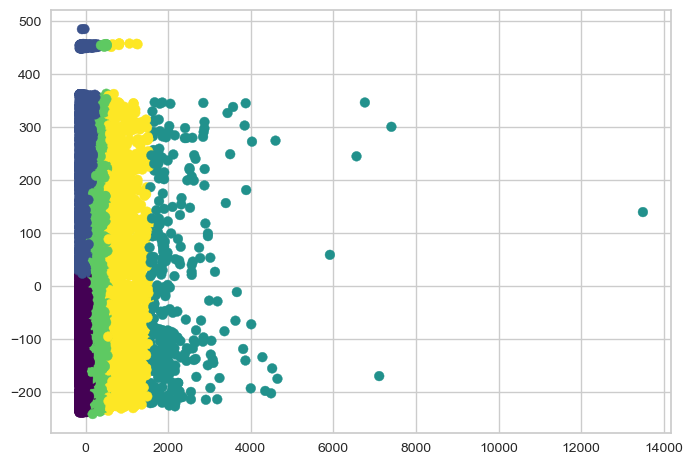

In [171]:
plot_kmeans(datak, 5)

In [172]:
def optimize_kmeans(X, max_clusters):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
        
    plt.plot(range(1, max_clusters + 1), sse)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for Optimal K")
    plt.show()
    return



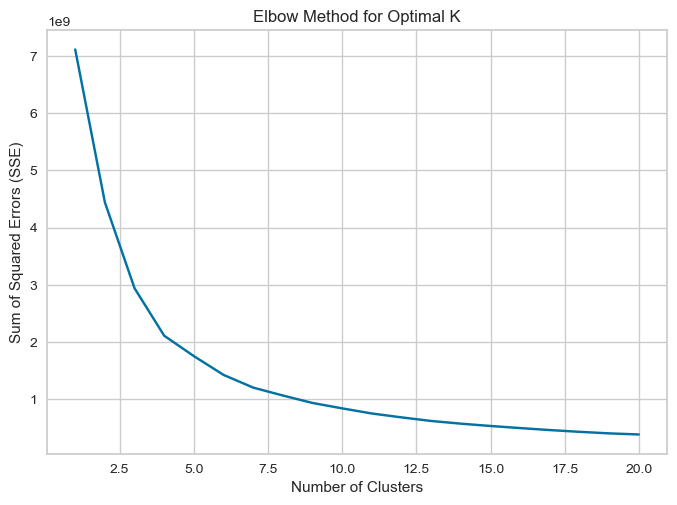

In [173]:
optimize_kmeans(datak, 20)

On peut voir une cassure entre 2.5 et 5

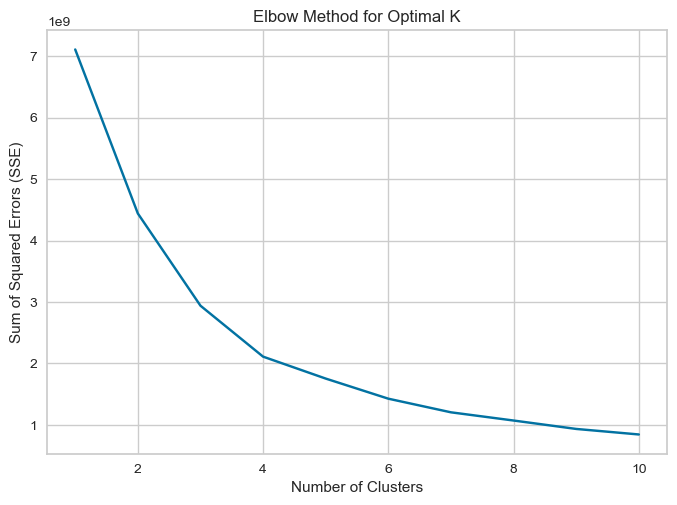

In [174]:
optimize_kmeans(datak, 10)

une cassure a 3 ou 4, nous allons utiliser la silhouette pour plus de precisions 

In [175]:

def analyse_silhouette(X2, n_clusters_liste):
    """
    Effectue une analyse de la silhouette pour différents nombres de clusters.
    
    Paramètres:
    X (numpy array): Les valeurs des caractéristiques.
    n_clusters_liste (liste): Une liste de nombres de clusters à tester.
    
    Retourne:
    meilleur_n_clusters (int): Le nombre de clusters avec le plus haut score de silhouette.
    meilleur_score_silhouette (float): Le plus haut score de silhouette.
    """
    meilleur_score_silhouette = -1
    meilleur_n_clusters = -1
    
    for n_clusters in n_clusters_liste:
        # Créer une instance de KMeans
        kmeans = KMeans(n_clusters=n_clusters)
        
        # Ajuster le modèle KMeans aux données
        kmeans.fit(X2)
        
        # Prédire les étiquettes de cluster pour chaque point de données
        étiquettes = kmeans.labels_
        
        # Calculer le score de silhouette pour le modèle
        score_silhouette = silhouette_score(X2, étiquettes)
        
        # Mettre à jour le meilleur score de silhouette et le nombre de clusters si le score actuel est meilleur
        if score_silhouette > meilleur_score_silhouette:
            meilleur_score_silhouette = score_silhouette
            meilleur_n_clusters = n_clusters
    
    return meilleur_n_clusters, meilleur_score_silhouette



In [176]:
# Extraire les valeurs des caractéristiques sous forme de tableau numpy
X2 = datak.values

# Définir la plage de nombres de clusters à tester
n_clusters_liste = range(2, 8)

# Effectuer l'analyse de la silhouette
meilleur_n_clusters, meilleur_score_silhouette = analyse_silhouette(X2, n_clusters_liste)

print("Meilleur nombre de clusters: {}".format(meilleur_n_clusters))
print("Meilleur score de silhouette: {:.3f}".format(meilleur_score_silhouette))


Meilleur nombre de clusters: 2
Meilleur score de silhouette: 0.735


C:\Users\boukh\AppData\Local\Temp\ipykernel_2588\3961377517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


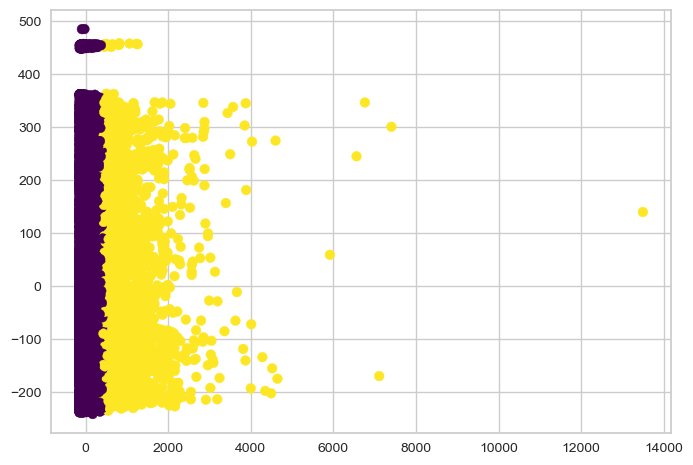

In [177]:
plot_kmeans(datak, 2)

In [384]:
XX = datak.values

In [385]:
kmeanss = KMeans(n_clusters=2)

In [386]:
kmeanss.fit(XX)

KMeans(n_clusters=2)

In [387]:
labels = kmeanss.labels_


In [388]:
silhouette_score(XX, labels)

0.7352600309229405

In [389]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [390]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


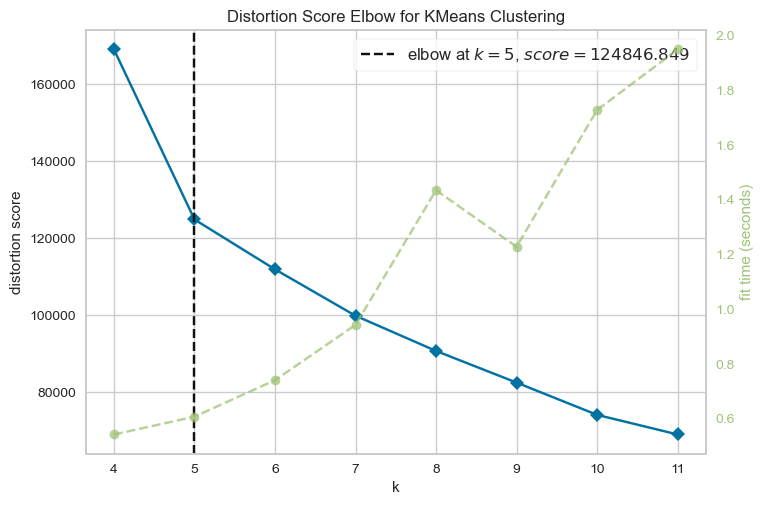

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [391]:
# Instantiate the clustering model and visualizer
model = KMeans(5)
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [392]:
model = KMeans(5, random_state=42)


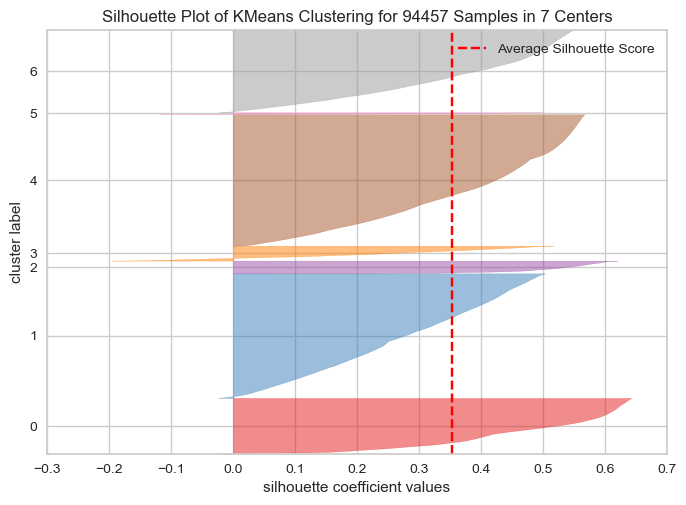

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 94457 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [393]:
# Instantiate the clustering model and visualizer 
model = KMeans(7)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

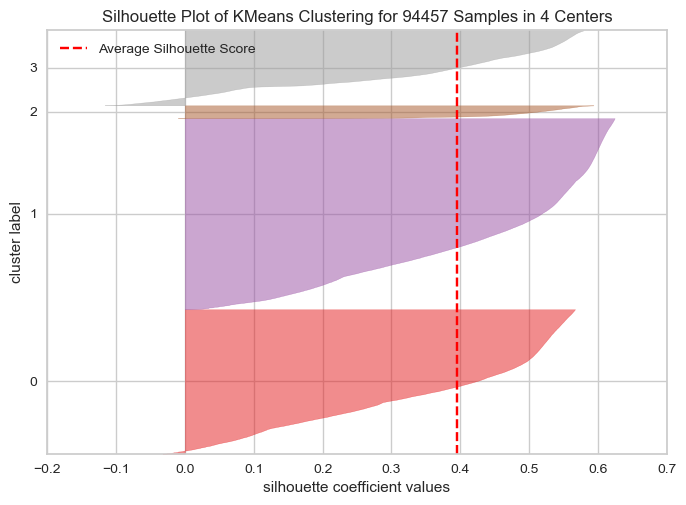

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 94457 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [395]:
# Instantiate the clustering model and visualizer 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

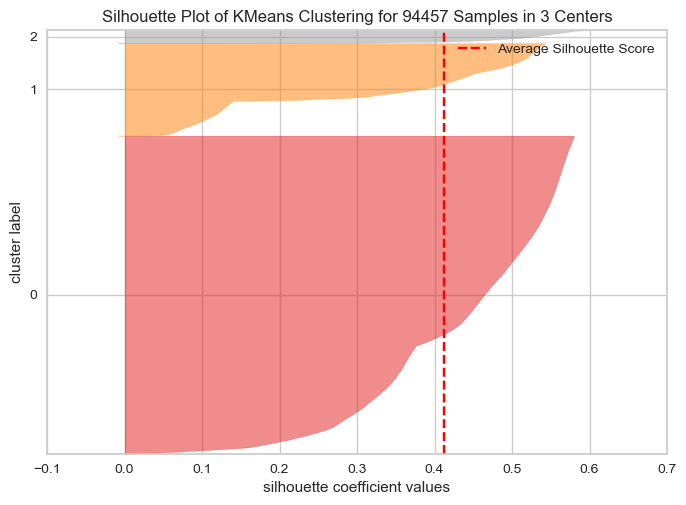

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 94457 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [396]:
# Instantiate the clustering model and visualizer 
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

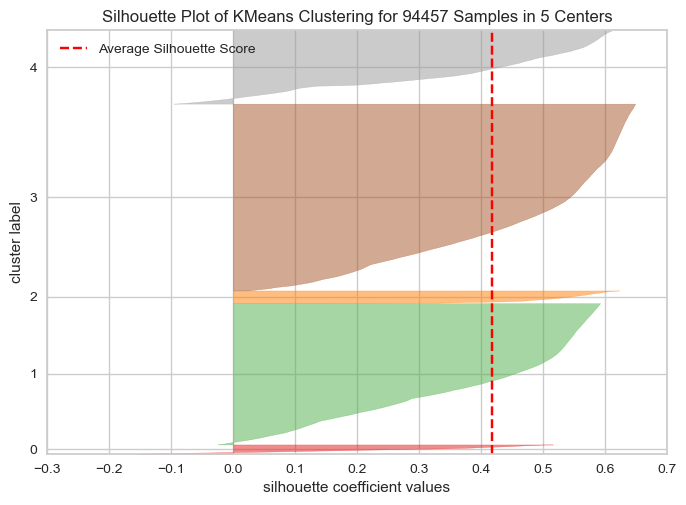

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 94457 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [394]:
# Instantiate the clustering model and visualizer 
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

optimisation avec 5 clusters 

In [398]:
kb = kmeans_cluster(datak,5)

C:\Users\boukh\AppData\Local\Temp\ipykernel_22592\915648448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


# RFM

In [399]:
kb

,order_id,payment_value,review_score,recence,cluster
0,1,142,5,115,1
1,1,27,4,118,1
2,1,86,3,541,0
3,1,44,4,325,0
4,1,197,5,292,0
...,...,...,...,...,...
94452,1,2067,5,451,4
94453,1,85,4,266,0
94454,1,112,5,572,0
94455,1,134,5,123,1


In [400]:
res_clusters_rfm  = kb.groupby(['cluster']).agg({
        'recence': 'mean',
        'order_id': 'mean',
        'payment_value': ['mean', 'count'],
        'review_score' : 'mean'
    }).round(0)

res_clusters_rfm

recence order_id payment_value        review_score
           mean     mean          mean  count         mean
cluster                                                   
0           398        1           110  34694            4
1           133        1           107  47767            4
2           223        1           399   9560            4
3           249        1           998   2097            4
4           233        1          2402    339            4

- cluster 0 = client ancien, énormement de commande a faible cout
- cluster 1 = client très recent, énormement de commande a faible cout
- cluster 2 = client recent, beaucoup de commande a prix moyen
- cluster 3 = client recent, peu de commande a prix élever
- cluster 4 = client recent, très peu de commande a prix très élever

In [404]:
dbs = DBSCAN(eps = 1, 
             min_samples=5,
               n_jobs=-1).fit(X_pca.copy())

C:\Users\boukh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation de la séparation des données du DBSCAN via T-SNE'}>

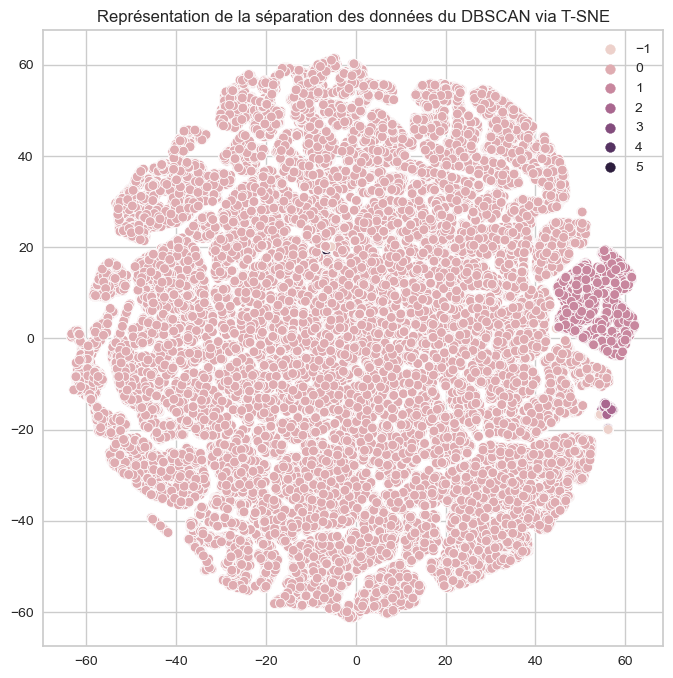

In [405]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du DBSCAN via T-SNE')
sns.scatterplot(T[:,0], T[:,1], dbs.labels_)

In [211]:
data_maintenance = datatime[['customer_unique_id',"recence","order_id", "payment_value","review_score", "order_purchase_timestamp"]]
data_maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94457 entries, 0 to 94456
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        94457 non-null  object        
 1   recence                   94457 non-null  int64         
 2   order_id                  94457 non-null  int64         
 3   payment_value             94457 non-null  float64       
 4   review_score              94457 non-null  float64       
 5   order_purchase_timestamp  94457 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.3+ MB


In [212]:
data_maintenance.to_csv("data_maintenance.csv")

# ARI

In [470]:
import pandas as pd

data_maintenance['order_purchase_timestamp'] = pd.to_datetime(data_maintenance['order_purchase_timestamp']) # Convertir la colonne "temps" en format de date

data_maintenance['temps_12M'] = data_maintenance['order_purchase_timestamp'] - pd.offsets.DateOffset(months=11) # Créer une nouvelle colonne avec des dates décalées de 11 mois pour avoir une plage de 12 mois
df_12M = data_maintenance.groupby('temps_12M').mean().reset_index() # Regrouper les données par plage de 12 mois et calculer la moyenne pour chaque groupe

# Visualiser les résultats
df_12M

C:\Users\boukh\AppData\Local\Temp\ipykernel_22592\2080223372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_maintenance['order_purchase_timestamp'] = pd.to_datetime(data_maintenance['order_purchase_timestamp']) # Convertir la colonne "temps" en format de date
C:\Users\boukh\AppData\Local\Temp\ipykernel_22592\2080223372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_maintenance['temps_12M'] = data_maintenance['order_purchase_timestamp'] - pd.offsets.DateOffset(months=11) # Créer une nouve

,temps_12M,recence,order_id,payment_value,review_score
0,2015-10-01,728,1,106,1
1,2015-11-01,696,1,189,4
2,2016-02-01,587,1,184,4
3,2016-03-01,566,1,170,4
4,2016-04-01,535,1,165,4
5,2016-05-01,504,1,175,4
6,2016-06-01,474,1,166,4
7,2016-07-01,444,1,161,4
8,2016-08-01,413,1,153,4
9,2016-09-01,382,1,161,4


In [471]:
n = 12 # Nombre de mois
start_date = data_maintenance['order_purchase_timestamp'].min() # Date de début
end_date = start_date + pd.DateOffset(months=n) # Date de fin
freq = 'MS' # Fréquence mensuelle

temps_initial = pd.date_range(start=start_date, end=end_date, freq=freq)


C:\Users\boukh\AppData\Local\Temp\ipykernel_22592\328698237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_maintenance['order_purchase_timestamp'] = pd.to_datetime(data_maintenance['order_purchase_timestamp'])
C:\Users\boukh\AppData\Local\Temp\ipykernel_22592\328698237.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_maintenance['mois'] = data_maintenance['order_purchase_timestamp'].dt.month
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Nu

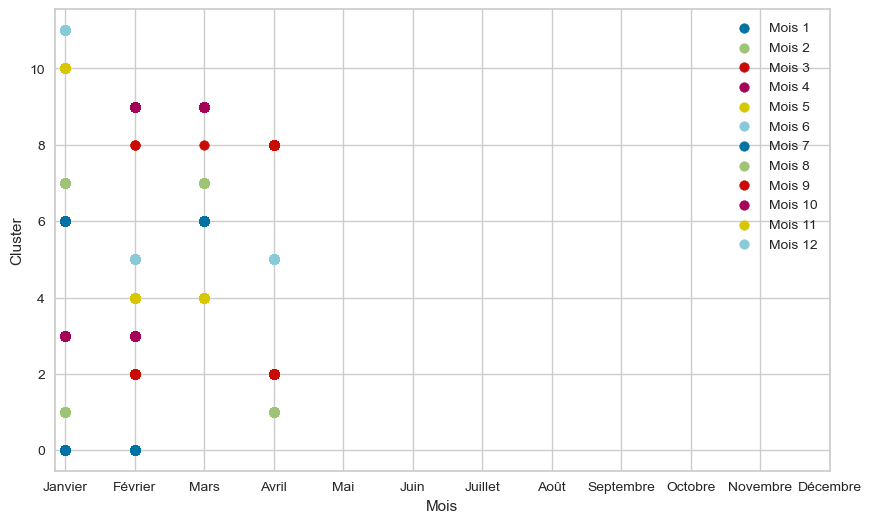

In [472]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Convertir la colonne 'temps' en format de date
data_maintenance['order_purchase_timestamp'] = pd.to_datetime(data_maintenance['order_purchase_timestamp'])

# Ajouter une colonne avec le mois correspondant à chaque date
data_maintenance['mois'] = data_maintenance['order_purchase_timestamp'].dt.month

# Appliquer l'algorithme de clustering à chaque mois
kmeans = KMeans(n_clusters=5)
clusters_par_mois = data_maintenance.groupby('mois')['order_purchase_timestamp'].apply(lambda x: kmeans.fit_predict(x.values.reshape(-1, 1)))

# Visualiser les résultats
fig, ax = plt.subplots(figsize=(10, 6))

for i, cluster in enumerate(clusters_par_mois):
    ax.scatter(cluster, [i]*len(cluster), label=f'Mois {i+1}')

ax.set_xticks(range(len(clusters_par_mois)))
ax.set_xticklabels(['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'])
ax.set_ylabel('Cluster')
ax.set_xlabel('Mois')
ax.legend()

plt.show()


In [474]:
data_maintenance

,recence,order_id,payment_value,review_score,order_purchase_timestamp,temps_12M,mois
0,115,1,142,5,2018-05-01,2017-06-01,5
1,118,1,27,4,2018-05-01,2017-06-01,5
2,541,1,86,3,2017-03-01,2016-04-01,3
3,325,1,44,4,2017-10-01,2016-11-01,10
4,292,1,197,5,2017-11-01,2016-12-01,11
...,...,...,...,...,...,...,...
94452,451,1,2067,5,2017-06-01,2016-07-01,6
94453,266,1,85,4,2017-12-01,2017-01-01,12
94454,572,1,112,5,2017-02-01,2016-03-01,2
94455,123,1,134,5,2018-05-01,2017-06-01,5


In [475]:

print("Date du dernier achat", data_maintenance.order_purchase_timestamp.max())
print("Date du premier achat", data_maintenance.order_purchase_timestamp.min())

Date du dernier achat 2018-09-01 00:00:00
Date du premier achat 2016-09-01 00:00:00


In [484]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

# Charger les données

# Séparer les données par mois
monthly_data = [data_maintenance[data_maintenance['mois'] == m] for m in range(1, 13)]

# Initialiser le score ARI du mois précédent à 0
prev_ari = 0

# Boucle à travers chaque mois de données
for i, month_data in enumerate(monthly_data):
    # Standardiser les données
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(month_data[['recence', 'payment_value', 'order_id','review_score']])
    # Effectuer le clustering
    kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_data)
    # Calculer le score ARI
    ari = adjusted_rand_score(month_data['mois'], kmeans.labels_)
    # Afficher le score ARI du mois courant et sa variation par rapport au mois précédent
    print(f"Month {i+1} ARI score: {ari:.4f} (change from previous month: {ari - prev_ari:.4f})")
    # Mettre à jour le score ARI précédent
    prev_ari = ari


Month 1 ARI score: 0.0000 (change from previous month: 0.0000)
Month 2 ARI score: 0.0000 (change from previous month: 0.0000)
Month 3 ARI score: 0.0000 (change from previous month: 0.0000)
Month 4 ARI score: 0.0000 (change from previous month: 0.0000)
Month 5 ARI score: 0.0000 (change from previous month: 0.0000)
Month 6 ARI score: 0.0000 (change from previous month: 0.0000)
Month 7 ARI score: 0.0000 (change from previous month: 0.0000)
Month 8 ARI score: 0.0000 (change from previous month: 0.0000)
Month 9 ARI score: 0.0000 (change from previous month: 0.0000)
Month 10 ARI score: 0.0000 (change from previous month: 0.0000)
Month 11 ARI score: 0.0000 (change from previous month: 0.0000)
Month 12 ARI score: 0.0000 (change from previous month: 0.0000)


In [584]:
from datetime import datetime

clients_date10 = data_maintenance[(data_maintenance["order_purchase_timestamp"] < datetime(2017, 12 , 31))]

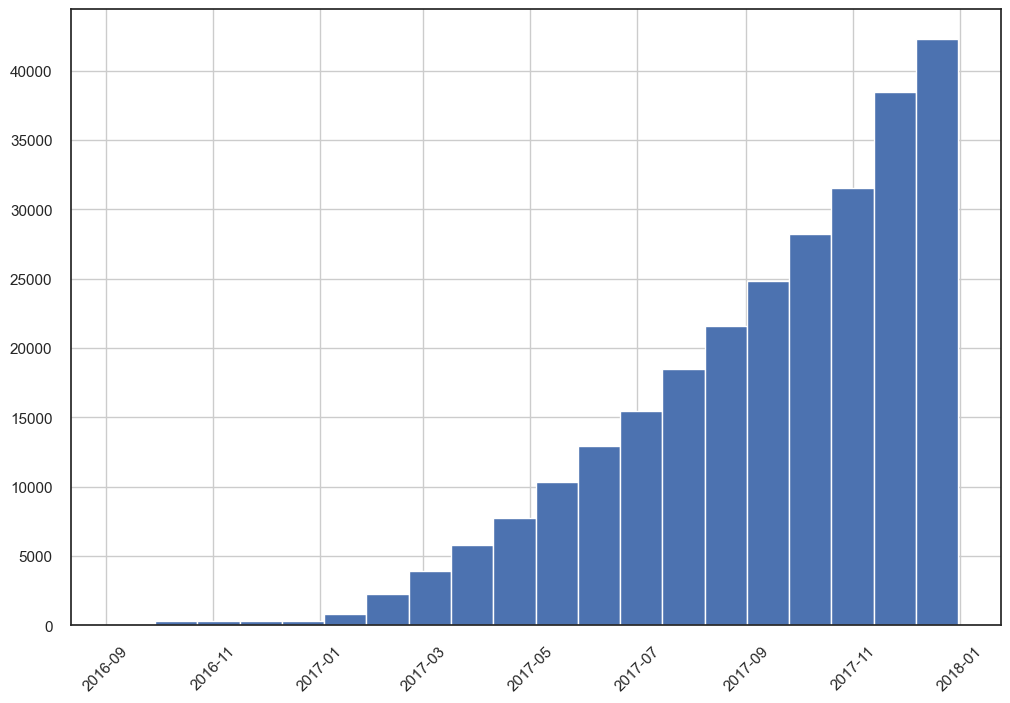

In [585]:
fig=plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
clients_date10["order_purchase_timestamp"].hist(bins=20, cumulative= True, density= False)
plt.show()

In [586]:
clients_date_drop = clients_date10.dropna()
clients_date_drop.sort_values("order_purchase_timestamp")

,customer_unique_id,recence,order_id,payment_value,review_score,order_purchase_timestamp,value_segment
67933,b7d76e111c89f7ebf14761390f0f7d17,728,1,136,1,2016-09-04 21:15:19,0
26784,4854e9b3feff728c13ee5fc7d1547e92,728,1,75,1,2016-09-05 00:15:34,0
5425,0eb1ee9dba87f5b36b4613a65074337c,700,1,109,1,2016-10-02 22:07:52,1
17582,2f64e403852e6893ae37485d5fcacdaf,699,1,39,4,2016-10-03 16:56:50,1
68279,b8b8726af116a5cfb35b0315ecef9172,699,1,36,1,2016-10-03 21:01:41,1
...,...,...,...,...,...,...,...
92914,fbd10bdfa725fd272755f9dd98752105,246,1,138,4,2017-12-30 21:44:05,24
66081,b2b779eb0dedff7f9eef0770287a9979,246,1,52,1,2017-12-30 22:07:13,24
72334,c3bbb44403eaca0b1a298510aa9cdae6,246,1,55,5,2017-12-30 22:29:45,24
17554,2f53681bf01c5cff02bada5809fe302e,246,1,103,5,2017-12-30 22:51:13,24


In [587]:
b0 = clients_date_drop[['order_id','recence','payment_value','review_score']]

In [588]:
std_0 = StandardScaler().fit(b0)
date0_std = std_0.transform(b0)

In [589]:
model_0 = KMeans(n_clusters=5).fit(date0_std)

In [590]:
date1 =data_maintenance[data_maintenance["order_purchase_timestamp"]<datetime(2018,1,1)]
date2 = data_maintenance[data_maintenance["order_purchase_timestamp"]<datetime(2018,2,1)]
date3 = data_maintenance[data_maintenance["order_purchase_timestamp"]<datetime(2018,3,1)]
date4 = data_maintenance[data_maintenance["order_purchase_timestamp"]<datetime(2018,4,1)]
date5= data_maintenance[data_maintenance["order_purchase_timestamp"]<datetime(2018,5,1)]
date6= data_maintenance[data_maintenance["order_purchase_timestamp"]<datetime(2018,6,1)]
date7 = data_maintenance[data_maintenance["order_purchase_timestamp"]<datetime(2018,7,1)]
date8 = data_maintenance[data_maintenance["order_purchase_timestamp"]<datetime(2018,8,1)]
#date9 = clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,6,1)]
#date10 = clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,6,15)]
#date11= clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,7,1)]
#date12= clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,7,15)]
#date13 = clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,8,1)]
#date14= clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,8,15)]
#date15 = clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,9,1)]
#date16 = clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,9,15)]
#date17= clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,10,1)]
#date18= clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,10,15)]
#date19= clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,11,1)]
#date20 = clients[clients["order_purchase_timestamp"]<datetime.datetime(2018,11,15)]

In [591]:
date1_drop = date1.dropna()
date2_drop = date2.dropna()
date3_drop = date3.dropna()
date4_drop = date4.dropna()
date5_drop = date5.dropna()
date6_drop = date6.dropna()
date7_drop = date7.dropna()
date8_drop = date8.dropna()
#date9_drop = date9.dropna()
#date10_drop = date10.dropna()
#date11_drop= date11.dropna()
#date13_drop = date13.dropna()
#date12_drop= date12.dropna()
#date14_drop = date14.dropna()
#date15_drop = date15.dropna()
#date16_drop = date16.dropna()
#date17_drop= date17.dropna()
#date18_drop= date18.dropna()
#date19_drop= date19.dropna()
#date20_drop = date20.dropna()

In [592]:
date8_drop.sort_values("order_purchase_timestamp")

,customer_unique_id,recence,order_id,payment_value,review_score,order_purchase_timestamp,value_segment
67933,b7d76e111c89f7ebf14761390f0f7d17,728,1,136,1,2016-09-04 21:15:19,0
26784,4854e9b3feff728c13ee5fc7d1547e92,728,1,75,1,2016-09-05 00:15:34,0
5425,0eb1ee9dba87f5b36b4613a65074337c,700,1,109,1,2016-10-02 22:07:52,1
17582,2f64e403852e6893ae37485d5fcacdaf,699,1,39,4,2016-10-03 16:56:50,1
68279,b8b8726af116a5cfb35b0315ecef9172,699,1,36,1,2016-10-03 21:01:41,1
...,...,...,...,...,...,...,...
54062,92940a7c21067630362e012337723701,33,1,53,5,2018-07-31 23:44:57,34
64864,af598bb6b0f5cdc1ef888ed8059f764e,33,1,100,5,2018-07-31 23:45:08,34
48493,830be05486a3cdadc108dc8c434beea3,33,1,66,4,2018-07-31 23:46:01,34
54524,93d5e580e27ed4d75679467817ab734d,33,1,270,5,2018-07-31 23:49:16,34


In [593]:
b1 = date1_drop[['order_id','recence','payment_value','review_score']]
b2 = date2_drop[['order_id','recence','payment_value','review_score']]
b3 = date3_drop[['order_id','recence','payment_value','review_score']]
b4 = date4_drop[['order_id','recence','payment_value','review_score']]
b5 = date5_drop[['order_id','recence','payment_value','review_score']]
b6 = date6_drop[['order_id','recence','payment_value','review_score']]
b7 = date7_drop[['order_id','recence','payment_value','review_score']]
b8 = date8_drop[['order_id','recence','payment_value','review_score']]
#b9 = date9_drop[['Frequence','Recence','Montant', 'score']]
#b10 = date10_drop[['Frequence','Recence','Montant', 'score']]
#b11 = date11_drop[['Frequence','Recence','Montant', 'score']]
#b12 = date12_drop[['Frequence','Recence','Montant', 'score']]
#b13 = date13_drop[['Frequence','Recence','Montant', 'score']]
#b14 = date14_drop[['Frequence','Recence','Montant', 'score']]
#b15 = date15_drop[['Frequence','Recence','Montant', 'score']]
#b16 = date16_drop[['Frequence','Recence','Montant', 'score']]
#b17 = date17_drop[['Frequence','Recence','Montant', 'score']]
#b18 = date18_drop[['Frequence','Recence','Montant', 'score']]
#b19 = date19_drop[['Frequence','Recence','Montant', 'score']]
#b20 = date20_drop[['Frequence','Recence','Montant', 'score']]

In [594]:
b1_std_0 = std_0.transform(b1)
label_1_0 = model_0.predict(b1_std_0)
b1_std_1 = StandardScaler().fit_transform(b1)
model_1 = KMeans(n_clusters=5).fit(b1_std_1)
label_1_1 = model_1.predict(b1_std_1)


b2_std_0 = std_0.transform(b2)
label_2_0 = model_0.predict(b2_std_0)
b2_std_2 = StandardScaler().fit_transform(b2)
model_2 = KMeans(n_clusters=5).fit(b2_std_2)
label_2_2 = model_2.predict(b2_std_2)

b3_std_0 = std_0.transform(b3)
label_3_0 = model_0.predict(b3_std_0)
b3_std_3 = StandardScaler().fit_transform(b3)
model_3 = KMeans(n_clusters=5).fit(b3_std_3)
label_3_3 = model_1.predict(b3_std_3)

b4_std_0 = std_0.transform(b4)
label_4_0 = model_0.predict(b4_std_0)
b4_std_4 = StandardScaler().fit_transform(b4)
model_4 = KMeans(n_clusters=5).fit(b4_std_4)
label_4_4 = model_4.predict(b4_std_4)

b5_std_0 = std_0.transform(b5)
label_5_0 = model_0.predict(b5_std_0)
b5_std_5 = StandardScaler().fit_transform(b5)
model_5 = KMeans(n_clusters=5).fit(b5_std_5)
label_5_5 = model_5.predict(b5_std_5)

b6_std_0 = std_0.transform(b6)
label_6_0 = model_0.predict(b6_std_0)
b6_std_6 = StandardScaler().fit_transform(b6)
model_6 = KMeans(n_clusters=5).fit(b6_std_6)
label_6_6 = model_5.predict(b6_std_6)

b7_std_0 = std_0.transform(b7)
label_7_0 = model_0.predict(b7_std_0)
b7_std_7 = StandardScaler().fit_transform(b7)
model_7 = KMeans(n_clusters=5).fit(b7_std_7)
label_7_7 = model_5.predict(b7_std_7)

b8_std_0 = std_0.transform(b8)
label_8_0 = model_0.predict(b8_std_0)
b8_std_8 = StandardScaler().fit_transform(b8)
model_8 = KMeans(n_clusters=5).fit(b8_std_8)
label_8_8 = model_8.predict(b8_std_8)

In [595]:
ari_0_1 = adjusted_rand_score(label_1_0,label_1_1)
ari_0_2 = adjusted_rand_score(label_2_0,label_2_2)
ari_0_3 = adjusted_rand_score(label_3_0,label_3_3)
ari_0_4 = adjusted_rand_score(label_4_0,label_4_4)
ari_0_5 = adjusted_rand_score(label_5_0,label_5_5)
ari_0_6 = adjusted_rand_score(label_6_0,label_6_6)
ari_0_7 = adjusted_rand_score(label_7_0,label_7_7)
ari_0_8 = adjusted_rand_score(label_8_0,label_8_8)

In [596]:
ari_0_1, ari_0_2, ari_0_3, ari_0_4, ari_0_5, ari_0_6, ari_0_7, ari_0_8

(0.9923795814153066,
 0.8297862398621365,
 0.7491093101175844,
 0.6235914734259506,
 0.6302560346576466,
 0.5839429117533648,
 0.5513474463255338,
 0.5325542557749845)

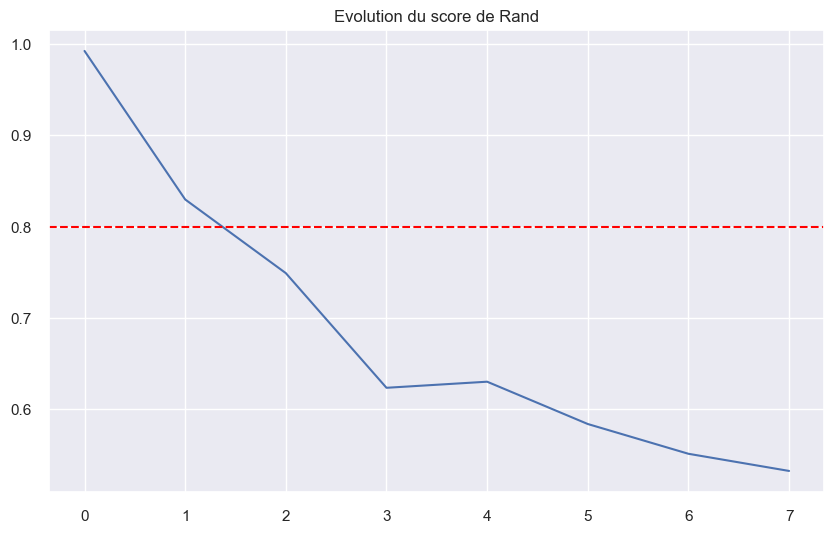

In [597]:
# Evolution du score de Rand
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.lineplot(x=range(0,8), y =[ari_0_1,ari_0_2,ari_0_3,ari_0_4,ari_0_5,ari_0_6, ari_0_7, ari_0_8])
                            #ars9, ars10, ars11,ars12, ars13, ars14, ars15, ars16, ars17, ars18, ars19, ars20]);
ax.axhline(0.8, c = 'red', ls='--');
ax.set(title='Evolution du score de Rand');

La segmentation de la clientèle devient obsolète au bout d'un mois et demi.